In [1]:
import pandas as pd

In [2]:
cluster = pd.read_csv("ST7620_cluster_de_bajas_4.csv")
cluster

,numero_de_cliente,foto_mes,active_quarter,cliente_vip,internet,cliente_edad,cliente_antiguedad,mrentabilidad,mrentabilidad_annual,mcomisiones,...,Visa_mpagospesos,Visa_mpagosdolares,Visa_fechaalta,Visa_mconsumototal,Visa_cconsumos,Visa_cadelantosefectivo,Visa_mpagominimo,clase_ternaria,pos,cluster2
0,4580855,202006,0,0.0,0.0,46.0,282.0,0.00,0.00,0.00,...,-24743.92,0.0,5908.0,8140.12,3.0,0.0,0.0,BAJA+1,1.0,1.0
1,4580855,202005,1,0.0,1.0,46.0,281.0,559.97,10010.14,370.69,...,-5382.00,0.0,5878.0,8261.77,5.0,0.0,561.6,BAJA+2,2.0,1.0
2,4580855,202004,1,0.0,1.0,46.0,280.0,113.17,10024.96,1192.37,...,-12573.73,0.0,5847.0,10174.07,7.0,0.0,702.0,CONTINUA,3.0,1.0
3,4580855,202003,1,0.0,1.0,46.0,279.0,1494.62,11593.97,1183.44,...,-17998.08,0.0,5817.0,7737.86,4.0,0.0,596.7,CONTINUA,4.0,1.0
4,4580855,202002,1,0.0,1.0,46.0,278.0,354.03,12242.02,65.68,...,-7614.36,0.0,5786.0,4560.83,3.0,0.0,1298.7,CONTINUA,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7483,12515742,202003,1,0.0,1.0,43.0,242.0,144.60,11034.87,23.50,...,-211.95,0.0,4543.0,0.00,0.0,0.0,23.4,CONTINUA,3.0,2.0
7484,12515742,202002,1,0.0,1.0,43.0,241.0,407.81,11539.12,92.55,...,-215.36,0.0,4512.0,0.00,0.0,0.0,35.1,CONTINUA,4.0,2.0
7485,12515742,202001,1,0.0,1.0,43.0,240.0,1238.00,20920.23,73.45,...,-218.77,0.0,4483.0,0.00,0.0,0.0,35.1,CONTINUA,5.0,2.0
7486,12515742,201912,1,0.0,1.0,42.0,239.0,1136.24,40645.19,310.24,...,-222.18,0.0,4452.0,0.00,0.0,0.0,35.1,CONTINUA,6.0,2.0


In [3]:
cluster.drop(7487, axis=0, inplace=True)

In [4]:
cluster1 = cluster[cluster["cluster2"]==1]
cluster2 = cluster[cluster["cluster2"]==2]
cluster3 = cluster[cluster["cluster2"]==3]
cluster4 = cluster[cluster["cluster2"]==4]

# 1-Calculo de las variables determinantes por cluster

In [ ]:
cluster_resumen = cluster.groupby("cluster2").mean().T
cluster_resumen["media_centroides"] = cluster.mean()
cluster_resumen["dispersion_centroides"] = cluster.std()
cluster_resumen["coef_variacion_centroides"] = cluster.std() / cluster.mean()
cluster_resumen= cluster_resumen.sort_values(by="coef_variacion_centroides", ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


In [ ]:
coef_variacion_promedio = cluster_resumen["coef_variacion_centroides"].mean()
desvio_coef_variacion_promedio = cluster_resumen["coef_variacion_centroides"].std()

print("coef_variacion_prom:",coef_variacion_promedio)
print("desvio_coef_variacion_prom:",desvio_coef_variacion_promedio)

coef_variacion_prom: 7.520246093261315
desvio_coef_variacion_prom: 16.968594129300154


In [ ]:
cluster_resumen["cluster_max"] = cluster_resumen[[1,2,3,4]].apply(lambda x: abs(x).idxmax(), axis=1)

In [ ]:
top_variables_filtradas = cluster_resumen[abs(cluster_resumen["coef_variacion_centroides"]) > 2]

In [ ]:
len(top_variables_filtradas)

119

In [ ]:
top_variables_cluster1 = list(top_variables_filtradas.groupby("cluster_max").groups[1])
top_variables_cluster2 = list(top_variables_filtradas.groupby("cluster_max").groups[2])
top_variables_cluster3 = list(top_variables_filtradas.groupby("cluster_max").groups[3])
top_variables_cluster4 = list(top_variables_filtradas.groupby("cluster_max").groups[4])

In [ ]:
print("cantidad de variables cluster 1:",len(top_variables_cluster1))
print("cantidad de variables cluster 2:",len(top_variables_cluster2))
print("cantidad de variables cluster 3:",len(top_variables_cluster3))
print("cantidad de variables cluster 4:",len(top_variables_cluster4))

cantidad de variables cluster 1: 71
cantidad de variables cluster 2: 17
cantidad de variables cluster 3: 7
cantidad de variables cluster 4: 24


#2-Checkeo Clusters

## Cluster_1


### 1-Intro

In [ ]:
top_variables_filtradas.loc[top_variables_cluster1][:10]

cluster2,1.0,2.0,3.0,4.0,media_centroides,dispersion_centroides,coef_variacion_centroides,cluster_max
mcheques_emitidos,12860.498017,1779.908887,1301.701000,1527.911621,4042.178557,117220.585710,28.999359,1.0
mcheques_depositados,22238.446583,3189.394953,2245.598733,1204.716250,6878.054247,187470.934049,27.256391,1.0
minversion1_dolares,3129.988241,20.262677,0.000000,0.000000,666.088013,17374.597014,26.084536,1.0
mcheques_depositados_rechazados,329.659060,112.464511,302.250000,163.229873,171.811810,4164.848188,24.240756,1.0
Master_msaldodolares,1027.962136,127.046456,0.000000,326.551674,354.192571,7246.620302,20.459549,1.0
minversion2,66749.542175,2097.630660,0.000000,1185.666663,15395.447474,307310.388796,19.961121,1.0
ctarjeta_master_descuentos,0.020473,0.016453,0.010000,0.009534,0.016161,0.220219,13.626285,1.0
mtarjeta_visa_descuentos,24.314572,9.753610,0.769633,9.238596,12.330494,153.647713,12.460791,1.0
Master_mpagosdolares,6.507450,5.770154,0.000000,1.116158,5.508360,67.813620,12.311035,1.0
ccheques_depositados,0.213692,0.091667,0.106667,0.049788,0.112462,1.345146,11.960939,1.0


In [ ]:
cluster1_variables_positivas = ["mcheques_emitidos","mcheques_depositados","minversion1_dolares","Master_msaldodolares"]

In [ ]:
top_variables_filtradas.loc[top_variables_cluster1].index[60:72]

Index(['cseguro_accidentes_personales', 'mrentabilidad_annual',
       'mtarjeta_visa_consumo', 'chomebanking_trx',
       'mtarjeta_visa_debitos_automaticos', 'ccuenta_debitos_automaticos',
       'cseguro_vivienda', 'ccajas_trx', 'Visa_mconsumospesos',
       'Visa_mconsumototal', 'Master_mpagospesos'],
      dtype='object')

In [ ]:
posibles_variables_cluster1 = ["mcheques_emitidos","mcheques_depositados",'Master_msaldodolares','minversion2','Master_mpagosdolares','Visa_msaldodolares',
       'Visa_mpagosdolares','mtransferencias_emitidas', 'mtransferencias_recibidas','mcaja_ahorro_dolares',"mcaja_ahorro","mcuentas_saldo","mpayroll",
       "mttarjeta_master_debitos_automaticos","ctransferencias_recibidas","mpasivos_margen","mpagomiscuentas","ccajas_depositos","cforex_sell","cforex",
       "ctarjeta_master_trx","mcuenta_debitos_automaticos","ctransferencias_emitidas","cpagomiscuentas","Visa_msaldopesos","Visa_msaldototal","mrentabilidad_annual",
       "mtarjeta_visa_consumo","mtarjeta_visa_debitos_automaticos"]

In [ ]:
len(posibles_variables_cluster1)

29

In [ ]:
cluster1_clusters_coef_variacion = (cluster1.groupby("numero_de_cliente").std() / cluster1.groupby("numero_de_cliente").mean() )
cluster1_clusters_coef_variacion.loc["mean"] =cluster1_clusters_coef_variacion.mean()
cluster1_clusters_coef_variacion.loc["porcentaje_de_nans"] = cluster1_clusters_coef_variacion.isna().sum()/ len(cluster1_clusters_coef_variacion) * 100


In [ ]:
cluster1_clusters_FINAL = cluster1_clusters_coef_variacion[posibles_variables_cluster1]
cluster1_clusters_FINAL = cluster1_clusters_FINAL[cluster1_clusters_FINAL.T["porcentaje_de_nans"][cluster1_clusters_FINAL.T["porcentaje_de_nans"]<35].index]

In [ ]:
cluster1_clusters_FINAL.T.sort_values(by="porcentaje_de_nans").T

,mpasivos_margen,Visa_msaldopesos,Visa_msaldototal,mrentabilidad_annual,mtarjeta_visa_consumo,mcuentas_saldo,mtarjeta_visa_debitos_automaticos,mcaja_ahorro,mtransferencias_recibidas,ctransferencias_recibidas,mcaja_ahorro_dolares
numero_de_cliente,,,,,,,,,,,
4580855,0.597202,0.289328,0.289328,0.570009,0.579705,0.564625,1.297437,1.946291,1.052267,0.912871,0.175105
4605422,0.841965,0.361999,0.373805,0.556583,0.500785,-0.949186,0.180720,3.464102,NaN,NaN,0.111893
4617524,0.505498,0.505149,0.505148,0.317822,0.610814,1.107751,0.080395,0.621943,0.954969,0.666667,NaN
4632622,0.691642,0.205445,0.204881,0.331755,0.232308,0.351505,0.159545,0.261571,0.387039,0.527535,0.201496
4667343,1.065081,0.656338,1.000451,0.499824,0.915688,0.907440,0.676735,0.811896,0.877816,0.587438,0.102095
...,...,...,...,...,...,...,...,...,...,...,...
11012273,0.756129,0.188763,0.188763,0.468729,0.372329,1.585728,0.112854,1.203908,2.342029,2.335497,NaN
12391420,0.422999,1.041366,1.041366,0.558988,0.403979,7.156948,0.644768,1.149252,0.924160,0.738549,0.105218
12455895,1.101466,0.659135,0.659134,0.509326,0.712264,1.465942,0.505941,0.295085,1.199232,1.085441,1.768491


In [ ]:
cluster1_clusters_FINAL.loc["mean"].sort_values(ascending=False)

mcuentas_saldo                       2.940678
mtransferencias_recibidas            1.312501
ctransferencias_recibidas            1.091888
mcaja_ahorro                         0.970923
mpasivos_margen                      0.962262
mcaja_ahorro_dolares                 0.904097
mtarjeta_visa_consumo                0.634706
Visa_msaldototal                     0.574290
Visa_msaldopesos                     0.563624
mrentabilidad_annual                 0.477850
mtarjeta_visa_debitos_automaticos    0.391023
Name: mean, dtype: float64

In [ ]:
variables_finales_cluster1

['mcuentas_saldo',
 'mtransferencias_recibidas',
 'ctransferencias_recibidas',
 'mcaja_ahorro',
 'mpasivos_margen',
 'mcaja_ahorro_dolares',
 'mtarjeta_visa_consumo',
 'Visa_msaldototal',
 'Visa_msaldopesos',
 'mrentabilidad_annual',
 'mtarjeta_visa_debitos_automaticos']

In [ ]:
from scipy.stats import linregress

In [ ]:
dict_pendientes= {}

for column in variables_finales_cluster1:
  dict_pendientes[column] = cluster1[["numero_de_cliente","foto_mes"]+variables_finales_cluster1].groupby("numero_de_cliente").apply(lambda x: linregress(x.foto_mes, x[column])[0])

cluster1_pendientes = pd.DataFrame(dict_pendientes, index=cluster1["numero_de_cliente"].unique())

In [ ]:
(cluster1_pendientes < 0).sum()

mcuentas_saldo                       79
mtransferencias_recibidas            46
ctransferencias_recibidas            43
mcaja_ahorro                         62
mpasivos_margen                      99
mcaja_ahorro_dolares                 38
mtarjeta_visa_consumo                91
Visa_msaldototal                     66
Visa_msaldopesos                     63
mrentabilidad_annual                 69
mtarjeta_visa_debitos_automaticos    48
dtype: int64

In [ ]:
cluster1_pendientes.loc["cant_de_pendientes_nulas"] = (cluster1_pendientes < 0).sum()
cluster1_pendientes.loc["cant_de_pendientes_positivas"] = len(cluster1_pendientes) - cluster1_pendientes.loc["cant_de_pendientes_nulas"]
cluster1_pendientes

,mcuentas_saldo,mtransferencias_recibidas,ctransferencias_recibidas,mcaja_ahorro,mpasivos_margen,mcaja_ahorro_dolares,mtarjeta_visa_consumo,Visa_msaldototal,Visa_msaldopesos,mrentabilidad_annual,mtarjeta_visa_debitos_automaticos
4580855,-54364.448000,-2574.000000,-0.300000,223.629000,-25.626000,-18308.806000,-2366.125000,-1742.099000,-2038.255000,-2606.787000,-41.154000
4605422,-121.427023,0.000000,0.000000,-1.739988,-3.107320,0.004512,-218.285121,-79.506365,-46.820773,-180.124022,46.410079
4617524,-0.269578,3.707848,0.006145,1.548741,-1.160811,0.000000,29.829105,43.675008,51.099799,-11.997261,12.837451
4632622,-155.760332,-346.925951,-0.013625,3.670322,-18.095792,906.538026,40.513843,27.682590,32.663894,101.815839,15.736753
4667343,-100.289634,124.009525,0.018799,19.866909,-0.136399,0.963056,7.287902,21.664314,-19.834691,30.728553,18.929577
...,...,...,...,...,...,...,...,...,...,...,...
11012273,-459.931481,22.507672,0.002407,-355.396905,-3.923890,0.000000,20.294206,29.239139,34.209770,52.809665,2.563903
12391420,339.100524,1231.792203,0.104895,2086.858986,34.885769,0.805000,-391.986538,5229.455000,6118.462203,-283.074790,-376.199406
12455895,-2679.395168,5.573478,-0.020055,-213.855331,-9.519306,-3451.511385,3.996255,44.946791,52.587753,-5.847466,-0.722997
cant_de_pendientes_nulas,79.000000,46.000000,43.000000,62.000000,99.000000,38.000000,91.000000,66.000000,63.000000,69.000000,48.000000


In [ ]:
cluster1_pendientes["mcuentas_saldo"][cluster1_pendientes["mcuentas_saldo"]<0].index

Index([ 4580855,  4605422,  4617524,  4632622,  4667343,  4709868,  4711385,
        4821460,  4844095,  4877428,  4998954,  5124244,  5159250,  5178163,
        5192900,  5274355,  5294132,  5301178,  5306330,  5519846,  5520106,
        5540580,  5554837,  5560231,  5662804,  5682288,  5822513,  5882222,
        5946587,  6051271,  6083743,  6186366,  6269483,  6297877,  6301266,
        6441140,  6502244,  6611342,  6629723,  6697889,  6747869,  7006061,
        7042557,  7094760,  7096300,  7180890,  7316061,  7373417,  7373486,
        7435837,  7483344,  7539745,  7630336,  7736236,  7777190,  7788013,
        7861064,  7944652,  8101113,  8268535,  8290988,  8312401,  8314927,
        8314968,  8328706,  8378076,  8734813,  8779807,  8836208,  8856418,
        8861712,  8982814,  9005091,  9089867,  9127060,  9130685,  9131131,
       11012273, 12455895],
      dtype='object')

In [ ]:
caracteristicas_cliente1 = ["mcuentas_saldo","mcaja_ahorro","mpasivos_margen","mtarjeta_visa_consumo","Visa_msaldototal","mrentabilidad_annual"]

In [ ]:
cluster1

,numero_de_cliente,foto_mes,active_quarter,cliente_vip,internet,cliente_edad,cliente_antiguedad,mrentabilidad,mrentabilidad_annual,mcomisiones,...,Visa_mpagospesos,Visa_mpagosdolares,Visa_fechaalta,Visa_mconsumototal,Visa_cconsumos,Visa_cadelantosefectivo,Visa_mpagominimo,clase_ternaria,pos,cluster2
0,4580855,202006,0,0.0,0.0,46.0,282.0,0.00,0.00,0.00,...,-24743.92,0.0,5908.0,8140.12,3.0,0.0,0.0,BAJA+1,1.0,1.0
1,4580855,202005,1,0.0,1.0,46.0,281.0,559.97,10010.14,370.69,...,-5382.00,0.0,5878.0,8261.77,5.0,0.0,561.6,BAJA+2,2.0,1.0
2,4580855,202004,1,0.0,1.0,46.0,280.0,113.17,10024.96,1192.37,...,-12573.73,0.0,5847.0,10174.07,7.0,0.0,702.0,CONTINUA,3.0,1.0
3,4580855,202003,1,0.0,1.0,46.0,279.0,1494.62,11593.97,1183.44,...,-17998.08,0.0,5817.0,7737.86,4.0,0.0,596.7,CONTINUA,4.0,1.0
4,4580855,202002,1,0.0,1.0,46.0,278.0,354.03,12242.02,65.68,...,-7614.36,0.0,5786.0,4560.83,3.0,0.0,1298.7,CONTINUA,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7452,12455895,202001,1,0.0,1.0,47.0,241.0,921.84,29540.27,-61.64,...,-9380.25,0.0,2511.0,14783.72,6.0,0.0,585.0,CONTINUA,8.0,1.0
7453,12455895,201912,1,0.0,1.0,47.0,240.0,1108.99,30206.24,168.33,...,-6352.72,0.0,2480.0,10550.25,7.0,0.0,0.0,CONTINUA,9.0,1.0
7454,12455895,201911,1,0.0,1.0,47.0,239.0,991.24,29722.71,188.18,...,-14356.70,0.0,2449.0,6352.72,5.0,0.0,245.7,CONTINUA,10.0,1.0
7455,12455895,201910,1,0.0,1.0,47.0,238.0,0.00,0.00,0.00,...,-1939.88,0.0,2419.0,14356.70,7.0,0.0,573.3,CONTINUA,11.0,1.0


### 2-plots promedios

In [ ]:
caracteristicas_cliente1

['mcuentas_saldo',
 'mcaja_ahorro',
 'mpasivos_margen',
 'mtarjeta_visa_consumo',
 'Visa_msaldototal',
 'mrentabilidad_annual']

In [ ]:
from matplotlib import pyplot as plt

#### **mcuentas_saldo**

In [ ]:
clientes_con_pendiente_negativa = list(cluster1_pendientes["mcuentas_saldo"][cluster1_pendientes["mcuentas_saldo"]<0].index)

grafica_cliente1_mcuentas_saldo = cluster1.loc[cluster1["numero_de_cliente"].isin(clientes_con_pendiente_negativa)]
grafica_cliente1_mcuentas_saldo = grafica_cliente1_mcuentas_saldo.groupby("foto_mes").mean()["mcuentas_saldo"]
grafica_cliente1_mcuentas_saldo.drop(index=202006, inplace=True)
grafica_cliente1_mcuentas_saldo

foto_mes
201903    1.235003e+05
201904    1.268822e+05
201905    9.117643e+04
201906    1.042827e+06
201907    2.603966e+05
201908    3.229709e+05
201909    1.918585e+05
201910    1.130018e+05
201911    1.446778e+05
201912    3.062640e+05
202001    3.012866e+05
202002    3.050264e+05
202003    3.957698e+05
202004    4.621519e+05
202005    2.164459e+05
202007    2.060604e+05
202008    1.865008e+05
202009    3.049740e+05
202010    3.050525e+05
202011    1.377574e+04
202012    2.771888e+04
Name: mcuentas_saldo, dtype: float64

In [ ]:
dates=["2019-03","2019-04","2019-05","2019-06","2019-07","2019-08","2019-09","2019-10","2019-11","2019-12","2020-01","2020-02","2020-03","2020-04","2020-05","2020-07","2020-08","2020-09","2020-10","2020-11","2020-12"]

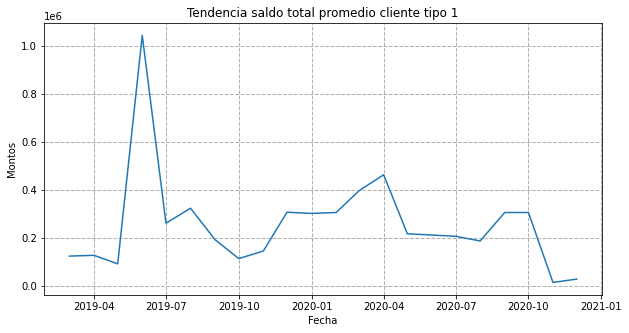

In [ ]:
grafica_cliente1_mcuentas_saldo.index = pd.DatetimeIndex(dates)

plt.figure(figsize=(10,5))
plt.plot(grafica_cliente1_mcuentas_saldo)
plt.grid(ls="dashed" ,lw=1 )
plt.ylabel("Montos")
plt.xlabel("Fecha")
#plt.xticks(ticks=list(grafica_cliente1_mcuentas_saldo.index))
#plt.yticks(ticks=[9000000,9500000,10000000,10500000])
#plt.ylim(9000000, 10500000)
plt.title("Tendencia saldo total promedio cliente tipo 1")
plt.show()


#### **mcaja_ahorro**

In [ ]:
clientes_con_pendiente_negativa = list(cluster1_pendientes["mcaja_ahorro"][cluster1_pendientes["mcaja_ahorro"]<10000].index)

grafica_cliente1_mcaja_ahorro = cluster1.loc[cluster1["numero_de_cliente"].isin(clientes_con_pendiente_negativa)]
grafica_cliente1_mcaja_ahorro = grafica_cliente1_mcaja_ahorro.groupby("foto_mes").mean()["mcaja_ahorro"]
grafica_cliente1_mcaja_ahorro.drop(index=202006, inplace=True)
grafica_cliente1_mcaja_ahorro

foto_mes
201903     42635.415000
201904     38128.492500
201905     43905.805385
201906     44163.843077
201907     34052.302564
201908     35527.536000
201909     32518.401833
201910     28790.434737
201911     33598.464950
201912     39091.713879
202001     58438.360156
202002     53798.597984
202003     42092.520084
202004    124668.300855
202005    140360.343391
202007     46252.508000
202008     47688.612667
202009     41433.644493
202010     30746.026727
202011     21726.361667
202012     23542.613077
202101     66714.135000
Name: mcaja_ahorro, dtype: float64

In [ ]:
dates=["2019-03","2019-04","2019-05","2019-06","2019-07","2019-08","2019-09","2019-10","2019-11","2019-12","2020-01","2020-02","2020-03","2020-04","2020-05","2020-07","2020-08","2020-09","2020-10","2020-11","2020-12","2021-01"]

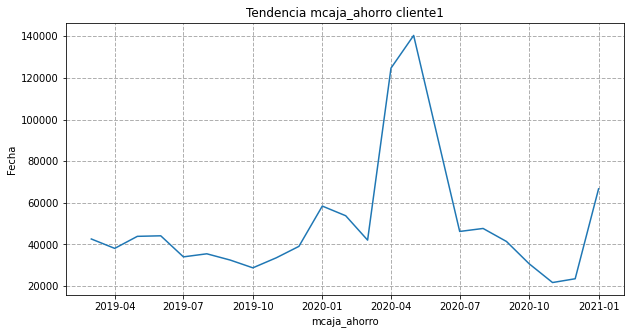

In [ ]:
grafica_cliente1_mcaja_ahorro.index = pd.DatetimeIndex(dates)

plt.figure(figsize=(10,5))
plt.plot(grafica_cliente1_mcaja_ahorro)
plt.grid(ls="dashed" ,lw=1 )
plt.ylabel("Fecha")
plt.xlabel("mcaja_ahorro")
#plt.xticks(ticks=list(grafica_cliente1_mcaja_ahorro.index))
#plt.yticks(ticks=[9000000,9500000,10000000,10500000])
#plt.ylim(9000000, 10500000)
plt.title("Tendencia mcaja_ahorro cliente1")
plt.show()


#### **mpasivos_margen**

In [ ]:
clientes_con_pendiente_negativa = list(cluster1_pendientes["mpasivos_margen"][cluster1_pendientes["mpasivos_margen"]<0].index)

grafica_cliente1_mpasivos_margen = cluster1.loc[cluster1["numero_de_cliente"].isin(clientes_con_pendiente_negativa)]
grafica_cliente1_mpasivos_margen = grafica_cliente1_mpasivos_margen.groupby("foto_mes").mean()["mpasivos_margen"]
grafica_cliente1_mpasivos_margen.drop(index=[202006,202101], inplace=True)
grafica_cliente1_mpasivos_margen

foto_mes
201903    2281.077000
201904    2309.946667
201905       0.000000
201906    3931.220455
201907    2060.632727
201908    2102.521765
201909    2056.299800
201910       0.000000
201911    1443.501975
201912    1651.173846
202001    2862.288660
202002    2548.274082
202003    3064.315568
202004    3250.306860
202005    2388.336471
202007    1025.672540
202008     854.343492
202009     620.695106
202010     591.475789
202011     615.171176
202012     252.640000
Name: mpasivos_margen, dtype: float64

In [ ]:
dates=["2019-03","2019-04","2019-05","2019-06","2019-07","2019-08","2019-09","2019-10","2019-11","2019-12","2020-01","2020-02","2020-03","2020-04","2020-05","2020-07","2020-08","2020-09","2020-10","2020-11","2020-12"]

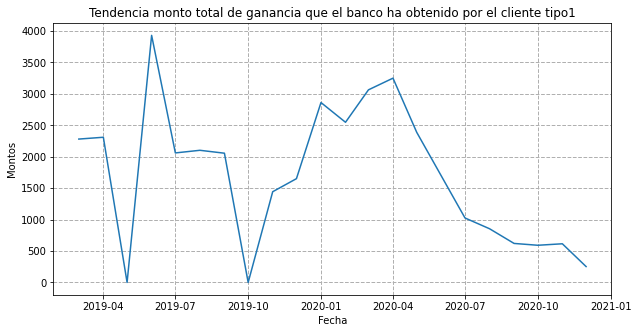

In [ ]:
grafica_cliente1_mpasivos_margen.index = pd.DatetimeIndex(dates)

plt.figure(figsize=(10,5))
plt.plot(grafica_cliente1_mpasivos_margen)
plt.grid(ls="dashed" ,lw=1 )
plt.ylabel("Montos")
plt.xlabel("Fecha")
#plt.xticks(ticks=list(grafica_cliente1_mpasivos_margen.index))
#plt.yticks(ticks=[9000000,9500000,10000000,10500000])
#plt.ylim(9000000, 10500000)
plt.title("Tendencia monto total de ganancia que el banco ha obtenido por el cliente tipo1")
plt.show()


#### **mtarjeta_visa_consumo**

In [ ]:
clientes_con_pendiente_negativa = list(cluster1_pendientes["mtarjeta_visa_consumo"][cluster1_pendientes["mtarjeta_visa_consumo"]<0].index)

grafica_cliente1_mtarjeta_visa_consumo = cluster1.loc[cluster1["numero_de_cliente"].isin(clientes_con_pendiente_negativa)]
grafica_cliente1_mtarjeta_visa_consumo = grafica_cliente1_mtarjeta_visa_consumo.groupby("foto_mes").mean()["mtarjeta_visa_consumo"]
grafica_cliente1_mtarjeta_visa_consumo.drop(index=[202006,202101], inplace=True)
grafica_cliente1_mtarjeta_visa_consumo

foto_mes
201903    26853.047500
201904    28559.172000
201905    23178.977273
201906    28031.795882
201907    35957.451923
201908    33286.855185
201909    29152.818780
201910    47119.604038
201911    36336.908986
201912    38204.043077
202001    39116.448409
202002    33625.803371
202003    32167.238025
202004    32276.658101
202005    27217.974805
202007    28870.156613
202008    25083.882419
202009    28427.963404
202010    21440.961081
202011    20825.806000
202012    14658.285455
Name: mtarjeta_visa_consumo, dtype: float64

In [ ]:
dates=["2019-03","2019-04","2019-05","2019-06","2019-07","2019-08","2019-09","2019-10","2019-11","2019-12","2020-01","2020-02","2020-03","2020-04","2020-05","2020-07","2020-08","2020-09","2020-10","2020-11","2020-12"]

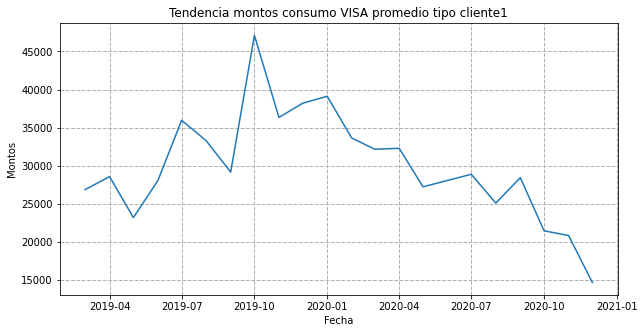

In [ ]:
grafica_cliente1_mtarjeta_visa_consumo.index = pd.DatetimeIndex(dates)

plt.figure(figsize=(10,5))
plt.plot(grafica_cliente1_mtarjeta_visa_consumo)
plt.grid(ls="dashed" ,lw=1 )
plt.ylabel("Montos")
plt.xlabel("Fecha")
#plt.xticks(ticks=list(grafica_cliente1_mtarjeta_visa_consumo.index))
#plt.yticks(ticks=[9000000,9500000,10000000,10500000])
#plt.ylim(9000000, 10500000)
plt.title("Tendencia montos consumo VISA promedio tipo cliente1")
plt.show()


#### **Visa_msaldototal**

In [ ]:
clientes_con_pendiente_negativa = list(cluster1_pendientes["Visa_msaldototal"][cluster1_pendientes["Visa_msaldototal"]<0].index)

grafica_cliente1_Visa_msaldototal = cluster1.loc[cluster1["numero_de_cliente"].isin(clientes_con_pendiente_negativa)]
grafica_cliente1_Visa_msaldototal = grafica_cliente1_Visa_msaldototal.groupby("foto_mes").mean()["Visa_msaldototal"]
grafica_cliente1_Visa_msaldototal.drop(index=[202006,202101], inplace=True)
grafica_cliente1_Visa_msaldototal

foto_mes
201903    26224.045000
201904    27739.207143
201905    23744.381250
201906    27229.935385
201907    34660.840667
201908    28109.266667
201909    58147.470909
201910    60227.511290
201911    52839.919778
201912    62863.998302
202001    60164.898548
202002    50773.058095
202003    54183.179298
202004    32602.773750
202005    23508.647593
202007    31016.735208
202008    43235.476042
202009    29617.890500
202010    23418.461515
202011    22828.396316
202012    23483.685000
Name: Visa_msaldototal, dtype: float64

In [ ]:
dates=["2019-03","2019-04","2019-05","2019-06","2019-07","2019-08","2019-09","2019-10","2019-11","2019-12","2020-01","2020-02","2020-03","2020-04","2020-05","2020-07","2020-08","2020-09","2020-10","2020-11","2020-12"]

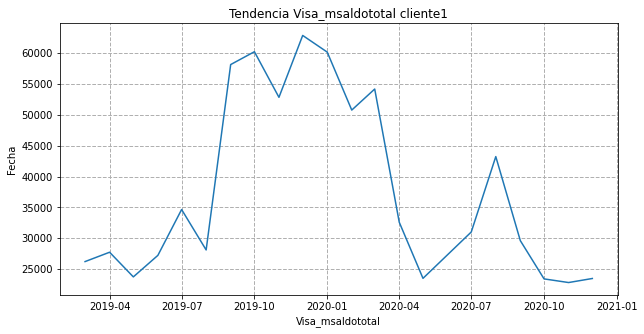

In [ ]:
grafica_cliente1_Visa_msaldototal.index = pd.DatetimeIndex(dates)

plt.figure(figsize=(10,5))
plt.plot(grafica_cliente1_Visa_msaldototal)
plt.grid(ls="dashed" ,lw=1 )
plt.ylabel("Fecha")
plt.xlabel("Visa_msaldototal")
#plt.xticks(ticks=list(grafica_cliente1_Visa_msaldototal.index))
#plt.yticks(ticks=[9000000,9500000,10000000,10500000])
#plt.ylim(9000000, 10500000)
plt.title("Tendencia Visa_msaldototal cliente1")
plt.show()


#### **mrentabilidad_annual**

In [ ]:
clientes_con_pendiente_negativa = list(cluster1_pendientes["mrentabilidad_annual"][cluster1_pendientes["mrentabilidad_annual"]<0].index)

grafica_cliente1_mrentabilidad_annual = cluster1.loc[cluster1["numero_de_cliente"].isin(clientes_con_pendiente_negativa)]
grafica_cliente1_mrentabilidad_annual = grafica_cliente1_mrentabilidad_annual.groupby("foto_mes").mean()["mrentabilidad_annual"]
grafica_cliente1_mrentabilidad_annual.drop(index=[202006,202101], inplace=True)
grafica_cliente1_mrentabilidad_annual

foto_mes
201903     14959.300000
201904     15333.560000
201905         0.000000
201906     98564.315000
201907     70296.935625
201908     66827.430000
201909     63291.126000
201910         0.000000
201911     49849.511346
201912     50315.551967
202001     68390.686471
202002     66121.372029
202003     65922.138939
202004     64727.463333
202005     62098.012273
202007     64245.896078
202008     59728.942549
202009     60782.604186
202010     66048.934706
202011     93112.790588
202012    148604.707500
Name: mrentabilidad_annual, dtype: float64

In [ ]:
dates=["2019-03","2019-04","2019-05","2019-06","2019-07","2019-08","2019-09","2019-10","2019-11","2019-12","2020-01","2020-02","2020-03","2020-04","2020-05","2020-07","2020-08","2020-09","2020-10","2020-11","2020-12"]

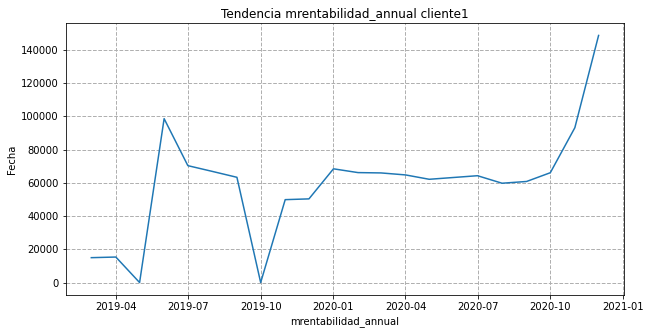

In [ ]:
grafica_cliente1_mrentabilidad_annual.index = pd.DatetimeIndex(dates)

plt.figure(figsize=(10,5))
plt.plot(grafica_cliente1_mrentabilidad_annual)
plt.grid(ls="dashed" ,lw=1 )
plt.ylabel("Fecha")
plt.xlabel("mrentabilidad_annual")
#plt.xticks(ticks=list(grafica_cliente1_mrentabilidad_annual.index))
#plt.yticks(ticks=[9000000,9500000,10000000,10500000])
#plt.ylim(9000000, 10500000)
plt.title("Tendencia mrentabilidad_annual cliente1")
plt.show()


#### **var_positiva**

In [ ]:
cluster1_variables_positivas

['mcheques_emitidos',
 'mcheques_depositados',
 'minversion1_dolares',
 'mcheques_depositados_rechazados',
 'Master_msaldodolares']

In [ ]:
#clientes_con_pendiente_negativa = list(cluster1_pendientes["Master_msaldodolares"][cluster1_pendientes["Master_msaldodolares"]<100000].index)

#grafica_cliente1_Master_msaldodolares = cluster1.loc[cluster1["numero_de_cliente"].isin(clientes_con_pendiente_negativa)]
grafica_cliente1_Master_msaldodolares = cluster1.groupby("foto_mes").mean()["Master_msaldodolares"]
grafica_cliente1_Master_msaldodolares

foto_mes
201903       0.000000
201904       0.000000
201905       0.000000
201906      50.178636
201907       0.000000
201908       0.000000
201909       1.209608
201910     742.503284
201911      15.896322
201912    1539.155051
202001      15.707000
202002    1408.085766
202003     200.750099
202004       9.383400
202005     526.552041
202006    2530.236207
202007    1668.435641
202008    1706.969367
202009    4225.698000
202010    4003.460000
202011      10.883462
202012     562.966667
202101    2964.305000
Name: Master_msaldodolares, dtype: float64

In [ ]:
dates=["2019-03","2019-04","2019-05","2019-06","2019-07","2019-08","2019-09","2019-10","2019-11","2019-12","2020-01","2020-02","2020-03","2020-04","2020-05","2020-06","2020-07","2020-08","2020-09","2020-10","2020-11","2020-12","2021-01"]

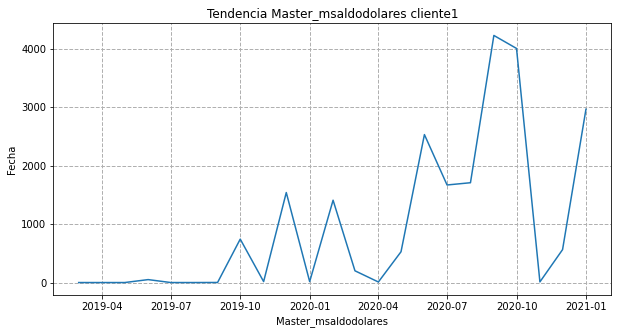

In [ ]:
grafica_cliente1_Master_msaldodolares.index = pd.DatetimeIndex(dates)

plt.figure(figsize=(10,5))
plt.plot(grafica_cliente1_Master_msaldodolares)
plt.grid(ls="dashed" ,lw=1 )
plt.ylabel("Fecha")
plt.xlabel("Master_msaldodolares")
#plt.xticks(ticks=list(grafica_cliente1_Master_msaldodolares.index))
#plt.yticks(ticks=[9000000,9500000,10000000,10500000])
#plt.ylim(9000000, 10500000)
plt.title("Tendencia Master_msaldodolares cliente1")
plt.show()


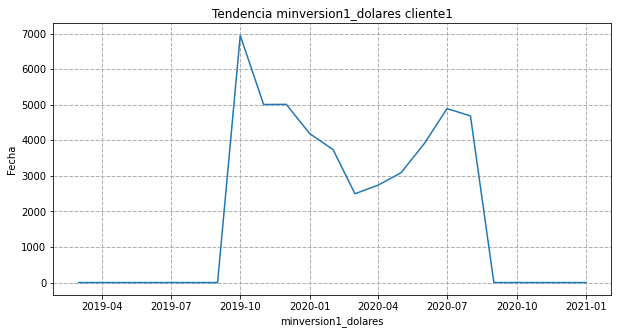

In [ ]:
grafica_cliente1_minversion1_dolares.index = pd.DatetimeIndex(dates)

plt.figure(figsize=(10,5))
plt.plot(grafica_cliente1_minversion1_dolares)
plt.grid(ls="dashed" ,lw=1 )
plt.ylabel("Fecha")
plt.xlabel("minversion1_dolares")
#plt.xticks(ticks=list(grafica_cliente1_minversion1_dolares.index))
#plt.yticks(ticks=[9000000,9500000,10000000,10500000])
#plt.ylim(9000000, 10500000)
plt.title("Tendencia minversion1_dolares cliente1")
plt.show()


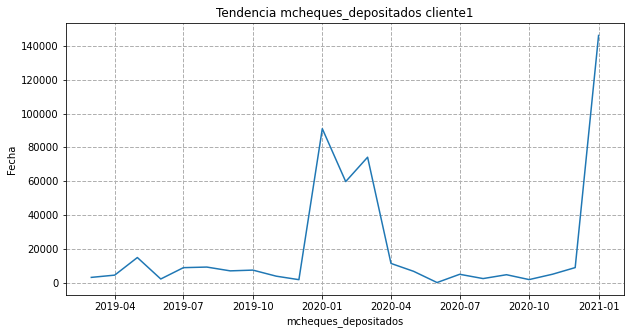

In [ ]:
grafica_cliente1_mcheques_depositados.index = pd.DatetimeIndex(dates)

plt.figure(figsize=(10,5))
plt.plot(grafica_cliente1_mcheques_depositados)
plt.grid(ls="dashed" ,lw=1 )
plt.ylabel("Fecha")
plt.xlabel("mcheques_depositados")
#plt.xticks(ticks=list(grafica_cliente1_mcheques_depositados.index))
#plt.yticks(ticks=[9000000,9500000,10000000,10500000])
#plt.ylim(9000000, 10500000)
plt.title("Tendencia mcheques_depositados cliente1")
plt.show()


### 3-Varios Clientes

In [ ]:
cluster1_variables_positivas

['mcheques_emitidos',
 'mcheques_depositados',
 'minversion1_dolares',
 'mcheques_depositados_rechazados',
 'Master_msaldodolares']

In [ ]:
clientes_cluster1 = cluster1["numero_de_cliente"].value_counts()
len(clientes_cluster1)

134

In [ ]:
import warnings

warnings.simplefilter("ignore")

In [ ]:
dates={201904:"2019-04",201905:"2019-05",201906:"2019-06",201907:"2019-07",201908:"2019-08",201909:"2019-09",201910:"2019-10",201911:"2019-11",201912:"2019-12",202001:"2020-01",202002:"2020-02",202003:"2020-03",202004:"2020-04",202005:"2020-05",202006:"2020-06",202007:"2020-07",202008:"2020-08",202009:"2020-09",202010:"2020-10",202012:"2020-11",202012:"2020-12"}

In [ ]:
cluster1_dates = cluster1.copy()
cluster1_dates["foto_mes"] = pd.DatetimeIndex(cluster1_dates["foto_mes"].replace(dates))
cluster1_dates

In [ ]:
for i in range(len(clientes_cluster1)):
    cluster1_dates[cluster1_dates["numero_de_cliente"]==cluster1_pendientes.index[i]][["foto_mes","mcheques_emitidos"]].sort_values(by="foto_mes").set_index("foto_mes").plot(title=cluster1_pendientes.index[i])

In [ ]:
nro_cliente = 7598408

In [ ]:
for i, variable in enumerate(variables_finales_cluster1_mes):
  if (variable != "foto_mes"):
    cluster1[cluster1["numero_de_cliente"]==nro_cliente][[variables_finales_cluster1_mes[-1],variables_finales_cluster1_mes[i]]].sort_values(by="foto_mes").set_index("foto_mes").plot()


## Cluster_2


### 1-Intro

In [ ]:
top_variables_filtradas.loc[top_variables_cluster2]

cluster2,1.0,2.0,3.0,4.0,media_centroides,dispersion_centroides,coef_variacion_centroides,cluster_max
Visa_madelantodolares,0.000000,0.008548,0.000000,0.000000,0.005310,0.378003,71.189887,2.0
cpayroll2_trx,0.000000,0.002778,0.000000,0.002119,0.002003,0.047612,23.764677,2.0
mprestamos_prendarios,0.000000,2194.513893,918.985467,1632.750847,1614.443363,29268.458246,18.129133,2.0
Visa_cadelantosefectivo,0.009622,0.026684,0.000000,0.000000,0.019534,0.340962,17.454523,2.0
mpagodeservicios,10.151465,51.955900,0.000000,12.672966,36.193887,626.849150,17.319200,2.0
Visa_madelantopesos,48.781270,68.975642,0.000000,0.000000,57.850300,951.494007,16.447521,2.0
minversion1_pesos,688.916180,5781.482286,316.614267,97.853909,3782.752966,60123.901607,15.894218,2.0
cliente_vip,0.004479,0.006197,0.000000,0.000000,0.004808,0.069180,14.387490,2.0
cpagodeservicios,0.012156,0.018162,0.000000,0.008475,0.014959,0.204911,13.697902,2.0
mforex_sell,27.926795,51.657585,18.720000,15.130879,40.778233,490.655760,12.032296,2.0


In [ ]:
cluster2_variables_buenas = ["minversion1_pesos","mcaja_ahorro_adicional","tpaquete7","Master_madelantopesos","mprestamos_prendarios"]

In [ ]:
cluster2_clusters_coef_variacion = (cluster2.groupby("numero_de_cliente").std() / cluster2.groupby("numero_de_cliente").mean() )
cluster2_clusters_coef_variacion.loc["mean"] =cluster2_clusters_coef_variacion.mean()
cluster2_clusters_coef_variacion.loc["porcentaje_de_nans"] = cluster2_clusters_coef_variacion.isna().sum()/ len(cluster2_clusters_coef_variacion) * 100
cluster2_clusters_coef_variacion[top_variables_cluster2]


,Visa_madelantodolares,cpayroll2_trx,mprestamos_prendarios,Visa_cadelantosefectivo,mpagodeservicios,Visa_madelantopesos,minversion1_pesos,cliente_vip,cpagodeservicios,mforex_sell,mcaja_ahorro_adicional,Master_cadelantosefectivo,tpaquete7,Master_madelantopesos,Master_fultimo_cierre,Visa_Fvencimiento,mcuenta_corriente_adicional
numero_de_cliente,,,,,,,,,,,,,,,,,
4607461,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.609865,-0.589167,NaN
4613352,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.779576,-0.063923,NaN
4642732,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.464102,NaN,NaN,NaN,NaN,0.822304,-0.091450,NaN
4665386,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.452654,2.026172,NaN,NaN,NaN,0.821790,-0.048204,NaN
4674057,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.779576,-0.309178,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12477807,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.000038,NaN
12509094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.076122,NaN
12515742,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.489898,NaN,NaN,NaN,NaN,0.193649,-0.042863,NaN


In [ ]:
cluster2_clusters_FINAL = cluster2_clusters_coef_variacion[top_variables_cluster2]
cluster2_clusters_FINAL = cluster2_clusters_FINAL[cluster2_clusters_FINAL.T["porcentaje_de_nans"][cluster2_clusters_FINAL.T["porcentaje_de_nans"]<50].index]

In [ ]:
cluster2_clusters_FINAL.T.sort_values(by="porcentaje_de_nans").T

,Visa_Fvencimiento,Master_fultimo_cierre
numero_de_cliente,,
4607461,-0.589167,0.609865
4613352,-0.063923,0.779576
4642732,-0.091450,0.822304
4665386,-0.048204,0.821790
4674057,-0.309178,0.779576
...,...,...
12477807,-0.000038,NaN
12509094,-0.076122,NaN
12515742,-0.042863,0.193649


In [ ]:
cluster2_clusters_FINAL.loc["mean"].sort_values(ascending=False)

Master_fultimo_cierre    0.547260
Visa_Fvencimiento       -0.166273
Name: mean, dtype: float64

In [ ]:
variables_finales_cluster2 = list(cluster2_clusters_FINAL.columns)
variables_finales_cluster2

['Master_fultimo_cierre', 'Visa_Fvencimiento']

In [ ]:
from scipy.stats import linregress

In [ ]:
dict_pendientes= {}

for column in top_variables_cluster2:
  dict_pendientes[column] = cluster2[["numero_de_cliente","foto_mes"]+top_variables_cluster2].groupby("numero_de_cliente").apply(lambda x: linregress(x.foto_mes, x[column])[0])

cluster2_pendientes = pd.DataFrame(dict_pendientes, index=cluster2["numero_de_cliente"].unique())

In [ ]:
cluster2_pendientes

,Visa_madelantodolares,cpayroll2_trx,mprestamos_prendarios,Visa_cadelantosefectivo,mpagodeservicios,Visa_madelantopesos,minversion1_pesos,cliente_vip,cpagodeservicios,mforex_sell,mcaja_ahorro_adicional,Master_cadelantosefectivo,tpaquete7,Master_madelantopesos,Master_fultimo_cierre,Visa_Fvencimiento,mcuenta_corriente_adicional
4607461,NaN,0.0,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,-0.001007,-14.665691,0.0
4613352,NaN,0.0,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.000000,0.000000,NaN,0.0,NaN,-0.021698,2.104819,0.0
4642732,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.027557,0.000000,NaN,0.0,NaN,-0.005143,1.980824,0.0
4665386,NaN,0.0,0.0,NaN,0.0,NaN,0.0,0.0,0.0,-1.806725,38.790027,0.0,0.0,0.0,-0.038232,2.084433,0.0
4674057,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,NaN,0.0,NaN,0.013488,-0.985609,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12411265,NaN,0.0,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.000000,0.000000,NaN,0.0,NaN,-0.090909,30.581818,0.0
12444717,NaN,0.0,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.000000,0.000000,NaN,0.0,NaN,-0.009525,1.984786,0.0
12477807,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,NaN,0.0,NaN,NaN,1.984786,0.0
12509094,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,NaN,0.0,NaN,NaN,2.000974,0.0


In [ ]:
(cluster2_pendientes < 0).sum()

Visa_madelantodolares            0
cpayroll2_trx                    2
mprestamos_prendarios            2
Visa_cadelantosefectivo          1
mpagodeservicios                18
Visa_madelantopesos              1
minversion1_pesos                4
cliente_vip                      4
cpagodeservicios                18
mforex_sell                     66
mcaja_ahorro_adicional           7
Master_cadelantosefectivo        1
tpaquete7                        0
Master_madelantopesos            1
Master_fultimo_cierre          224
Visa_Fvencimiento               50
mcuenta_corriente_adicional      1
dtype: int64

In [ ]:
cluster2_pendientes.loc["cant_de_pendientes_nulas"] = (cluster2_pendientes < 0).sum()
cluster2_pendientes.loc["cant_de_pendientes_positivas"] = len(cluster2_pendientes) - cluster2_pendientes.loc["cant_de_pendientes_nulas"]
cluster2_pendientes

,Visa_madelantodolares,cpayroll2_trx,mprestamos_prendarios,Visa_cadelantosefectivo,mpagodeservicios,Visa_madelantopesos,minversion1_pesos,cliente_vip,cpagodeservicios,mforex_sell,mcaja_ahorro_adicional,Master_cadelantosefectivo,tpaquete7,Master_madelantopesos,Master_fultimo_cierre,Visa_Fvencimiento,mcuenta_corriente_adicional
4607461,NaN,0.0,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,-0.001007,-14.665691,0.0
4613352,NaN,0.0,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.000000,0.000000,NaN,0.0,NaN,-0.021698,2.104819,0.0
4642732,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.027557,0.000000,NaN,0.0,NaN,-0.005143,1.980824,0.0
4665386,NaN,0.0,0.0,NaN,0.0,NaN,0.0,0.0,0.0,-1.806725,38.790027,0.0,0.0,0.0,-0.038232,2.084433,0.0
4674057,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,NaN,0.0,NaN,0.013488,-0.985609,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12477807,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,NaN,0.0,NaN,NaN,1.984786,0.0
12509094,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,NaN,0.0,NaN,NaN,2.000974,0.0
12515742,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.513542,0.000000,NaN,0.0,NaN,-0.030435,1.042397,0.0
cant_de_pendientes_nulas,0.0,2.0,2.0,1.0,18.0,1.0,4.0,4.0,18.0,66.000000,7.000000,1.0,0.0,1.0,224.000000,50.000000,1.0


### 2-plots promedios

In [ ]:
caracteristicas_cliente2 = variables_finales_cluster2
caracteristicas_cliente2

['Master_fultimo_cierre', 'Visa_Fvencimiento']

In [ ]:
from matplotlib import pyplot as plt

#### **Master_fultimo_cierre**

In [ ]:
clientes_con_pendiente_negativa = list(cluster2_pendientes["Master_fultimo_cierre"][cluster2_pendientes["Master_fultimo_cierre"]<0].index)

grafica_cliente2_Master_fultimo_cierre = cluster2.loc[cluster2["numero_de_cliente"].isin(clientes_con_pendiente_negativa)]
grafica_cliente2_Master_fultimo_cierre = grafica_cliente2_Master_fultimo_cierre.groupby("foto_mes").mean()["Master_fultimo_cierre"]
grafica_cliente2_Master_fultimo_cierre.drop(index=[202006], inplace=True)
grafica_cliente2_Master_fultimo_cierre

foto_mes
201803    10.000000
201804     8.500000
201805     4.500000
201806     6.500000
201807    13.000000
201903     6.916667
201904     2.000000
201905     5.500000
201906     9.636364
201907     3.723404
201908     6.835616
201909     9.010417
201910     4.733333
201911     7.142857
201912    10.005556
202001     6.110092
202002     7.054299
202003    10.038462
202004     5.096154
202005     8.063415
202007     6.315476
202008     9.319149
202009     4.235294
202010     7.571429
202011     9.100000
202012     5.729730
Name: Master_fultimo_cierre, dtype: float64

In [ ]:
dates=["2018-03","2018-04","2018-05","2018-06","2018-07","2019-03","2019-04","2019-05","2019-06","2019-07","2019-08","2019-09","2019-10","2019-11","2019-12","2020-01","2020-02","2020-03","2020-04","2020-05","2020-07","2020-08","2020-09","2020-10","2020-11","2020-12"]

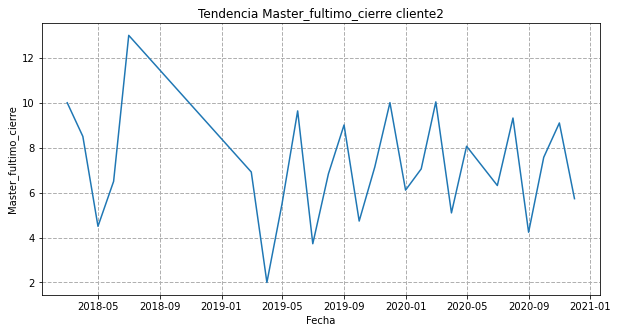

In [ ]:
grafica_cliente2_Master_fultimo_cierre.index = pd.DatetimeIndex(dates)

plt.figure(figsize=(10,5))
plt.plot(grafica_cliente2_Master_fultimo_cierre)
plt.grid(ls="dashed" ,lw=1 )
plt.ylabel("Master_fultimo_cierre")
plt.xlabel("Fecha")
#plt.xticks(ticks=list(grafica_cliente2_Master_fultimo_cierre.index))
#plt.yticks(ticks=[9000000,9500000,10000000,10500000])
#plt.ylim(9000000, 10500000)
plt.title("Tendencia Master_fultimo_cierre cliente2")
plt.show()


#### **Visa_Fvencimiento**

In [ ]:
clientes_con_pendiente_negativa = list(cluster2_pendientes["Visa_Fvencimiento"][cluster2_pendientes["Visa_Fvencimiento"]<0].index)

grafica_cliente2_Visa_Fvencimiento = cluster2.loc[cluster2["numero_de_cliente"].isin(clientes_con_pendiente_negativa)]
grafica_cliente2_Visa_Fvencimiento = grafica_cliente2_Visa_Fvencimiento.groupby("foto_mes").mean()["Visa_Fvencimiento"]
grafica_cliente2_Visa_Fvencimiento

foto_mes
201804    -668.000000
201805    -637.000000
201806    -607.000000
201903    -352.800000
201904    -334.875000
201905    -577.875000
201906    -646.307692
201907    -574.473684
201908    -605.080000
201909    -612.392857
201910    -781.485714
201911    -878.309524
201912   -1111.673913
202001   -1364.204082
202002   -1489.880000
202003   -1399.954545
202004   -1435.317073
202005   -1566.878049
202006   -1522.971429
202007   -1578.517241
202008   -1784.000000
202009   -1824.950000
202010   -1725.066667
202011   -1835.000000
202012   -2144.250000
202101   -2159.000000
Name: Visa_Fvencimiento, dtype: float64

In [ ]:
dates=["2018-04","2018-05","2018-06","2018-07","2019-03","2019-04","2019-05","2019-06","2019-07","2019-08","2019-09","2019-10","2019-11","2019-12","2020-01","2020-02","2020-03","2020-04","2020-05","2020-06","2020-07","2020-08","2020-09","2020-10","2020-11","2020-12"]

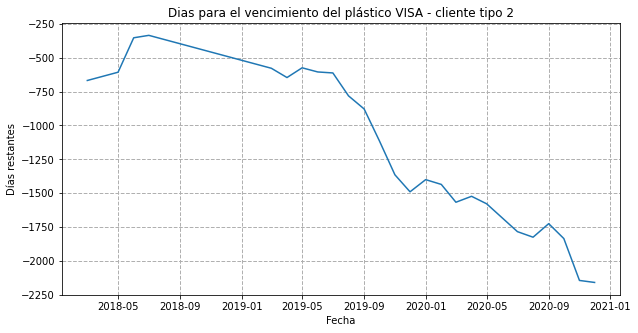

In [ ]:
grafica_cliente1_Visa_Fvencimiento.index = pd.DatetimeIndex(dates)

plt.figure(figsize=(10,5))
plt.plot(grafica_cliente1_Visa_Fvencimiento)
plt.grid(ls="dashed" ,lw=1 )
plt.ylabel("Días restantes")
plt.xlabel("Fecha")
#plt.xticks(ticks=list(grafica_cliente1_Visa_Fvencimiento.index))
#plt.yticks(ticks=[9000000,9500000,10000000,10500000])
#plt.ylim(9000000, 10500000)
plt.title("Dias para el vencimiento del plástico VISA - cliente tipo 2")
plt.show()


In [ ]:
cluster2["Visa_Fvencimiento"]

17     -2070.0
18     -2101.0
19     -2131.0
20     -2162.0
21     -2191.0
         ...  
7482   -1278.0
7483   -1308.0
7484   -1339.0
7485   -1368.0
7486   -1399.0
Name: Visa_Fvencimiento, Length: 4680, dtype: float64

#### **variables buenas**

In [ ]:
cluster2_variables_buenas

['minversion1_pesos',
 'mcaja_ahorro_adicional',
 'tpaquete7',
 'Master_madelantopesos',
 'mprestamos_prendarios']

In [ ]:
#clientes_con_pendiente_negativa = list(cluster1_pendientes["mcuentas_saldo"][cluster1_pendientes["mcuentas_saldo"]<0].index)

#grafica_cliente1_mcuentas_saldo = cluster1.loc[cluster1["numero_de_cliente"].isin(clientes_con_pendiente_negativa)]
grafica_cliente2_tpaquete7 = cluster2.groupby("foto_mes").mean()["tpaquete7"]
grafica_cliente2_tpaquete7.drop(index=[202006,202101], inplace=True)
grafica_cliente2_tpaquete7

foto_mes
201803    0.000000
201804    0.000000
201805    0.000000
201806    0.000000
201807    0.000000
201903    0.000000
201904    0.000000
201905    0.000000
201906    0.000000
201907    0.000000
201908    0.000000
201909    0.004739
201910    0.004016
201911    0.003436
201912    0.005970
202001    0.010283
202002    0.015228
202003    0.016260
202004    0.011173
202005    0.008772
202007    0.019531
202008    0.014218
202009    0.017241
202010    0.021127
202011    0.020408
202012    0.018868
Name: tpaquete7, dtype: float64

In [ ]:
dates=["2018-03","2018-04","2018-05","2018-06","2018-07","2019-03","2019-04","2019-05","2019-06","2019-07","2019-08","2019-09","2019-10","2019-11","2019-12","2020-01","2020-02","2020-03","2020-04","2020-05","2020-07","2020-08","2020-09","2020-10","2020-11","2020-12"]

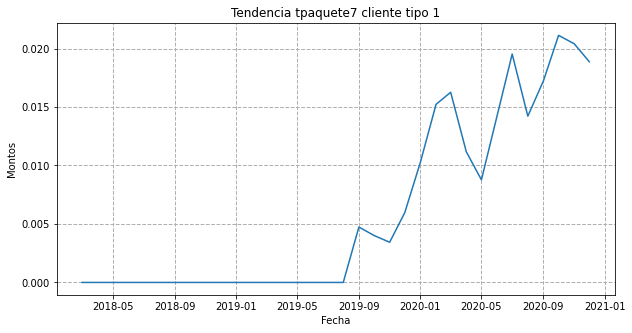

In [ ]:
grafica_cliente2_tpaquete7.index = pd.DatetimeIndex(dates)

plt.figure(figsize=(10,5))
plt.plot(grafica_cliente2_tpaquete7)
plt.grid(ls="dashed" ,lw=1 )
plt.ylabel("Montos")
plt.xlabel("Fecha")
#plt.xticks(ticks=list(grafica_cliente2_tpaquete7.index))
#plt.yticks(ticks=[9000000,9500000,10000000,10500000])
#plt.ylim(9000000, 10500000)
plt.title("Tendencia tpaquete7 cliente tipo 1")
plt.show()


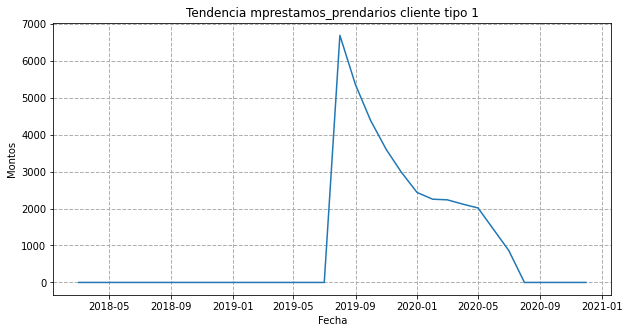

In [ ]:
grafica_cliente2_mprestamos_prendarios.index = pd.DatetimeIndex(dates)

plt.figure(figsize=(10,5))
plt.plot(grafica_cliente2_mprestamos_prendarios)
plt.grid(ls="dashed" ,lw=1 )
plt.ylabel("Montos")
plt.xlabel("Fecha")
#plt.xticks(ticks=list(grafica_cliente2_mprestamos_prendarios.index))
#plt.yticks(ticks=[9000000,9500000,10000000,10500000])
#plt.ylim(9000000, 10500000)
plt.title("Tendencia mprestamos_prendarios cliente tipo 1")
plt.show()


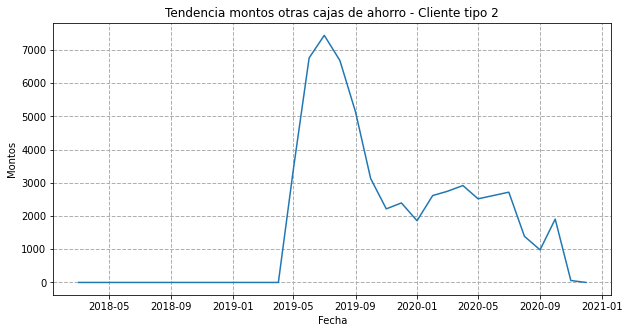

In [ ]:
grafica_cliente2_mcaja_ahorro_adicional.index = pd.DatetimeIndex(dates)

plt.figure(figsize=(10,5))
plt.plot(grafica_cliente2_mcaja_ahorro_adicional)
plt.grid(ls="dashed" ,lw=1 )
plt.ylabel("Montos")
plt.xlabel("Fecha")
#plt.xticks(ticks=list(grafica_cliente2_mcaja_ahorro_adicional.index))
#plt.yticks(ticks=[9000000,9500000,10000000,10500000])
#plt.ylim(9000000, 10500000)
plt.title("Tendencia montos otras cajas de ahorro - Cliente tipo 2")
plt.show()


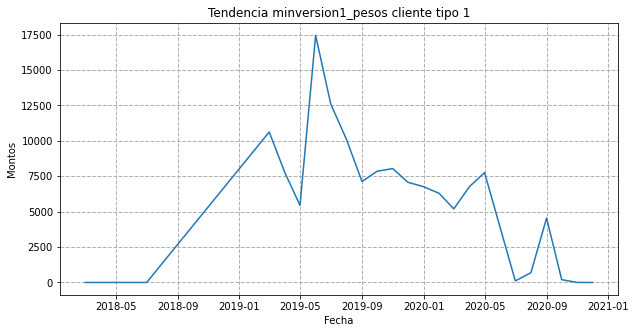

In [ ]:
grafica_cliente2_minversion1_pesos.index = pd.DatetimeIndex(dates)

plt.figure(figsize=(10,5))
plt.plot(grafica_cliente2_minversion1_pesos)
plt.grid(ls="dashed" ,lw=1 )
plt.ylabel("Montos")
plt.xlabel("Fecha")
#plt.xticks(ticks=list(grafica_cliente2_minversion1_pesos.index))
#plt.yticks(ticks=[9000000,9500000,10000000,10500000])
#plt.ylim(9000000, 10500000)
plt.title("Tendencia minversion1_pesos cliente tipo 1")
plt.show()


### 3-Varios Clientes

In [ ]:
cluster2_variables_buenas

['minversion1_pesos',
 'mcaja_ahorro_adicional',
 'tpaquete7',
 'Master_madelantopesos',
 'mprestamos_prendarios']

In [ ]:
clientes_cluster2 = cluster2["numero_de_cliente"].value_counts()
len(clientes_cluster2)

401

In [ ]:
import warnings

warnings.simplefilter("ignore")

In [ ]:
dates={201904:"2019-04",201905:"2019-05",201906:"2019-06",201907:"2019-07",201908:"2019-08",201909:"2019-09",201910:"2019-10",201911:"2019-11",201912:"2019-12",202001:"2020-01",202002:"2020-02",202003:"2020-03",202004:"2020-04",202005:"2020-05",202006:"2020-06",202007:"2020-07",202008:"2020-08",202009:"2020-09",202010:"2020-10",202012:"2020-11",202012:"2020-12"}

In [ ]:
cluster2_dates = cluster2.copy()
cluster2_dates["foto_mes"] = pd.DatetimeIndex(cluster2_dates["foto_mes"].replace(dates))
cluster2_dates

In [ ]:
for i in range(0,100):
    cluster3_dates[cluster3_dates["numero_de_cliente"]==cluster3_pendientes.index[i]][["foto_mes","mprestamos_prendarios"]].sort_values(by="foto_mes").set_index("foto_mes").plot(title=cluster3_pendientes.index[i])

In [ ]:
nro_cliente = 7598408

In [ ]:
for i, variable in enumerate(variables_finales_cluster1_mes):
  if (variable != "foto_mes"):
    cluster1[cluster1["numero_de_cliente"]==nro_cliente][[variables_finales_cluster1_mes[-1],variables_finales_cluster1_mes[i]]].sort_values(by="foto_mes").set_index("foto_mes").plot()


## Cluster_3


### 1-Intro

In [ ]:
top_variables_filtradas.loc[top_variables_cluster3]

cluster2,1.0,2.0,3.0,4.0,media_centroides,dispersion_centroides,coef_variacion_centroides,cluster_max
cprestamos_hipotecarios,0.000000,0.002350,0.010000,0.001059,0.002003,0.055393,27.648506,3.0
mtarjeta_master_descuentos,1.890588,2.413416,6.105633,1.761930,2.371037,46.920580,19.789057,3.0
ccheques_depositados_rechazados,0.003199,0.003846,0.010000,0.007415,0.004408,0.080784,18.328270,3.0
ccajeros_propios_descuentos,0.005758,0.006838,0.013333,0.005297,0.006678,0.109443,16.388040,3.0
Visa_fultimo_cierre,8.301983,8.585164,109.960870,7.471287,12.001378,95.412673,7.950143,3.0
Master_mconsumospesos,9639.597395,5538.434927,10383.160714,8178.353785,6998.167768,23304.870734,3.330139,3.0
Master_mconsumototal,9639.597395,5538.434927,10383.160714,8178.353785,6998.167768,23304.870734,3.330139,3.0


In [ ]:
cluster3_variables_buenas = ["Master_mconsumospesos","Master_mconsumototal"]

In [ ]:
cluster3_clusters_coef_variacion = (cluster3.groupby("numero_de_cliente").std() / cluster3.groupby("numero_de_cliente").mean() )
cluster3_clusters_coef_variacion.loc["mean"] =cluster3_clusters_coef_variacion.mean()
cluster3_clusters_coef_variacion.loc["porcentaje_de_nans"] = cluster3_clusters_coef_variacion.isna().sum()/ len(cluster3_clusters_coef_variacion) * 100
cluster3_clusters_coef_variacion[top_variables_cluster3]


,cprestamos_hipotecarios,mtarjeta_master_descuentos,ccheques_depositados_rechazados,ccajeros_propios_descuentos,Visa_fultimo_cierre,Master_mconsumospesos,Master_mconsumototal
numero_de_cliente,,,,,,,
4736379,NaN,NaN,NaN,NaN,0.779576,NaN,NaN
5239716,NaN,NaN,NaN,NaN,0.832824,NaN,NaN
5251412,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5342550,NaN,NaN,NaN,NaN,0.228744,1.732051,1.732051
5483205,NaN,NaN,NaN,NaN,0.779576,NaN,NaN
5512928,NaN,NaN,NaN,NaN,0.224624,NaN,NaN
5581345,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5619839,NaN,NaN,NaN,NaN,0.821790,NaN,NaN
6041893,NaN,NaN,NaN,NaN,0.711344,NaN,NaN


In [ ]:
cluster3_clusters_FINAL = cluster3_clusters_coef_variacion[top_variables_cluster3]
cluster3_clusters_FINAL = cluster3_clusters_FINAL[cluster3_clusters_FINAL.T["porcentaje_de_nans"][cluster3_clusters_FINAL.T["porcentaje_de_nans"]<50].index]

In [ ]:
cluster3_clusters_FINAL.T.sort_values(by="porcentaje_de_nans").T

,Visa_fultimo_cierre
numero_de_cliente,
4736379,0.779576
5239716,0.832824
5251412,NaN
5342550,0.228744
5483205,0.779576
5512928,0.224624
5581345,NaN
5619839,0.821790
6041893,0.711344


In [ ]:
cluster3_clusters_FINAL.loc["mean"].sort_values(ascending=False)

Visa_fultimo_cierre    0.64808
Name: mean, dtype: float64

In [ ]:
variables_finales_cluster3 = list(cluster3_clusters_FINAL.columns)
variables_finales_cluster3

['Visa_fultimo_cierre']

In [ ]:
from scipy.stats import linregress

In [ ]:
dict_pendientes= {}

for column in top_variables_cluster3:
  dict_pendientes[column] = cluster3[["numero_de_cliente","foto_mes"]+top_variables_cluster3].groupby("numero_de_cliente").apply(lambda x: linregress(x.foto_mes, x[column])[0])

cluster3_pendientes = pd.DataFrame(dict_pendientes, index=cluster3["numero_de_cliente"].unique())

In [ ]:
cluster3_pendientes

,cprestamos_hipotecarios,mtarjeta_master_descuentos,ccheques_depositados_rechazados,ccajeros_propios_descuentos,Visa_fultimo_cierre,Master_mconsumospesos,Master_mconsumototal
4736379,0.00000,0.000000,0.000000,0.000000,-0.021698,NaN,NaN
5239716,0.00000,0.000000,0.000000,0.000000,-0.045455,NaN,NaN
5251412,0.00000,0.000000,0.000000,0.000000,NaN,NaN,NaN
5342550,0.00000,0.000000,0.000000,0.000000,NaN,NaN,NaN
5483205,0.00000,0.000000,0.000000,0.000000,-0.021698,NaN,NaN
5512928,0.00000,0.000000,0.000000,0.000000,-0.021698,NaN,NaN
5581345,0.00000,0.000000,0.000000,0.000000,NaN,NaN,NaN
5619839,0.00000,0.000000,0.000000,0.000000,NaN,NaN,NaN
6041893,0.00000,0.000000,0.000000,0.000000,-0.010554,NaN,NaN
6042673,0.00000,0.000000,0.000000,0.000000,NaN,NaN,NaN


In [ ]:
(cluster3_pendientes < 0).sum()

cprestamos_hipotecarios             1
mtarjeta_master_descuentos          1
ccheques_depositados_rechazados     2
ccajeros_propios_descuentos         1
Visa_fultimo_cierre                14
Master_mconsumospesos               0
Master_mconsumototal                0
dtype: int64

In [ ]:
cluster3_pendientes.loc["cant_de_pendientes_nulas"] = (cluster3_pendientes < 0).sum()
cluster3_pendientes.loc["cant_de_pendientes_positivas"] = len(cluster3_pendientes) - cluster3_pendientes.loc["cant_de_pendientes_nulas"]
cluster3_pendientes

,cprestamos_hipotecarios,mtarjeta_master_descuentos,ccheques_depositados_rechazados,ccajeros_propios_descuentos,Visa_fultimo_cierre,Master_mconsumospesos,Master_mconsumototal
4736379,0.00000,0.000000,0.000000,0.000000,-0.021698,NaN,NaN
5239716,0.00000,0.000000,0.000000,0.000000,-0.045455,NaN,NaN
5251412,0.00000,0.000000,0.000000,0.000000,NaN,NaN,NaN
5342550,0.00000,0.000000,0.000000,0.000000,NaN,NaN,NaN
5483205,0.00000,0.000000,0.000000,0.000000,-0.021698,NaN,NaN
5512928,0.00000,0.000000,0.000000,0.000000,-0.021698,NaN,NaN
5581345,0.00000,0.000000,0.000000,0.000000,NaN,NaN,NaN
5619839,0.00000,0.000000,0.000000,0.000000,NaN,NaN,NaN
6041893,0.00000,0.000000,0.000000,0.000000,-0.010554,NaN,NaN
6042673,0.00000,0.000000,0.000000,0.000000,NaN,NaN,NaN


### 2-plots promedios

In [ ]:
caracteristicas_cliente3 = variables_finales_cluster3
caracteristicas_cliente3

['Visa_fultimo_cierre']

In [ ]:
from matplotlib import pyplot as plt

#### **Visa_fultimo_cierre**

In [ ]:
clientes_especificos_cluster3 = [4736379, 5239716, 5342550, 5483205, 5512928, 6155952, 6706089]

In [ ]:
#clientes_con_pendiente_negativa = list(cluster3_pendientes["Visa_fultimo_cierre"][cluster3_pendientes["Visa_fultimo_cierre"]<0].index)

grafica_cliente3_Visa_fultimo_cierre = cluster3.loc[cluster3["numero_de_cliente"].isin(clientes_especificos_cluster3)]
grafica_cliente3_Visa_fultimo_cierre = grafica_cliente3_Visa_fultimo_cierre.groupby("foto_mes").mean()["Visa_fultimo_cierre"]
grafica_cliente3_Visa_fultimo_cierre

foto_mes
201907    0.000000
201908    3.000000
201909    5.000000
201910    1.000000
201911    4.750000
201912    7.750000
202001    4.000000
202002    5.000000
202003    8.000000
202004    3.000000
202005    6.000000
202006    1.000000
202007    4.333333
202008    7.333333
202009    2.333333
202010    5.333333
202011    5.000000
202012    1.000000
Name: Visa_fultimo_cierre, dtype: float64

In [ ]:
dates=["2019-07","2019-08","2019-09","2019-10","2019-11","2019-12","2020-01","2020-02","2020-03","2020-04","2020-05","2020-06","2020-07","2020-08","2020-09","2020-10","2020-11","2020-12"]

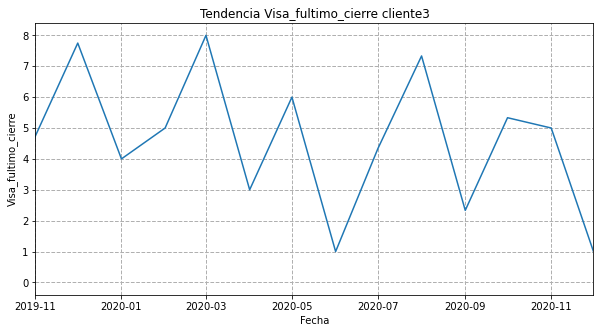

In [ ]:
grafica_cliente3_Visa_fultimo_cierre.index = pd.DatetimeIndex(dates)

plt.figure(figsize=(10,5))
plt.plot(grafica_cliente3_Visa_fultimo_cierre)
plt.grid(ls="dashed" ,lw=1 )
plt.ylabel("Visa_fultimo_cierre")
plt.xlabel("Fecha")
#plt.xticks(ticks=list(grafica_cliente3_Visa_fultimo_cierre.index))
plt.xlim(pd.to_datetime("2019-11"), pd.to_datetime("2020-12"))
plt.title("Tendencia Visa_fultimo_cierre cliente3")
plt.show()


In [ ]:
grafico = cluster[["numero_de_cliente","foto_mes","Visa_fultimo_cierre","cluster2"]].drop(index=[7314, 7315, 7316, 7317, 7318, 7319, 7320, 7321, 7322, 7323, 7324,
            7325]).groupby("cluster2").mean()
grafico

,numero_de_cliente,foto_mes,Visa_fultimo_cierre
cluster2,,,
1.0,6.906870e+06,201975.095329,8.301983
2.0,7.099491e+06,201972.253205,8.585164
3.0,6.781910e+06,201975.250000,4.853211
4.0,7.299805e+06,201969.921610,7.471287


In [ ]:
grafica = cluster[["numero_de_cliente","foto_mes","Visa_fultimo_cierre","cluster2"]].groupby("cluster2").median()[["Visa_fultimo_cierre"]]

In [ ]:
list(grafica.index)

[1.0, 2.0, 3.0, 4.0]

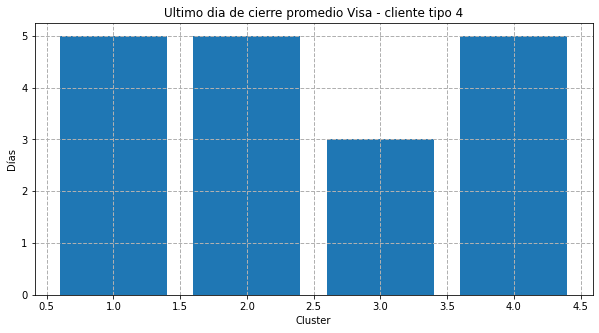

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(x=list(grafica.index), height = grafica["Visa_fultimo_cierre"])
plt.grid(ls="dashed" ,lw=1 )
plt.ylabel("Días")
plt.xlabel("Cluster")
#plt.xticks(ticks=list(grafica_cliente3_Visa_fultimo_cierre.index))
#plt.xlim(pd.to_datetime("2019-11"), pd.to_datetime("2020-12"))
plt.title("Ultimo dia de cierre promedio Visa - cliente tipo 4")
plt.show()

In [ ]:
cluster[cluster["numero_de_cliente"]==11210256].index

Int64Index([7314, 7315, 7316, 7317, 7318, 7319, 7320, 7321, 7322, 7323, 7324,
            7325],
           dtype='int64')

In [ ]:
cluster[["numero_de_cliente","foto_mes","Visa_fultimo_cierre","cluster2"]].groupby("cluster2").mean()

,numero_de_cliente,foto_mes,Visa_fultimo_cierre
cluster2,,,
1.0,6.906870e+06,201975.095329,8.301983
2.0,7.099491e+06,201972.253205,8.585164
3.0,6.959043e+06,201975.833333,109.960870
4.0,7.299805e+06,201969.921610,7.471287


In [ ]:
cluster3.groupby("numero_de_cliente").mean()["Visa_fultimo_cierre"].drop(index=11210256).mean()

4.691901154401154

In [ ]:
cluster2.groupby("numero_de_cliente").mean()["Visa_fultimo_cierre"]

numero_de_cliente
4607461      3.250000
4613352      2.833333
4642732      2.750000
4665386      2.818182
4674057      2.833333
              ...    
12411265     2.636364
12444717    24.083333
12477807     9.916667
12509094    10.083333
12515742    10.666667
Name: Visa_fultimo_cierre, Length: 401, dtype: float64

In [ ]:
cluster3[cluster3["numero_de_cliente"] == 11210256][["foto_mes","Visa_fultimo_cierre"]]

,foto_mes,Visa_fultimo_cierre
7314,202010,2355.0
7315,202009,2324.0
7316,202008,2294.0
7317,202007,2263.0
7318,202006,2232.0
7319,202005,2202.0
7320,202004,2171.0
7321,202003,2141.0
7322,202002,2110.0
7323,202001,2081.0


#### **variables_buenas**

In [ ]:
cluster3_variables_buenas

['Master_mconsumospesos', 'Master_mconsumototal']

In [ ]:
clientes_especificos_cluster3 = [4736379, 5239716, 5342550, 5483205, 5512928, 6155952, 6706089]

In [ ]:
#clientes_con_pendiente_negativa = list(cluster3_pendientes["Visa_fultimo_cierre"][cluster3_pendientes["Visa_fultimo_cierre"]<0].index)

#grafica_cliente3_Visa_fultimo_cierre = cluster3.loc[cluster3["numero_de_cliente"].isin(clientes_especificos_cluster3)]
grafica_cliente3_Master_mconsumospesos = cluster3.groupby("foto_mes").mean()["Master_mconsumospesos"]
grafica_cliente3_Master_mconsumospesos.drop(index=[202006], inplace=True)
grafica_cliente3_Master_mconsumospesos

foto_mes
201904             NaN
201905    21110.910000
201906    17161.310000
201907    51288.750000
201908     2405.630000
201909      659.170000
201910     9811.790000
201911     8446.920000
201912    22228.830000
202001     4083.646667
202002        0.000000
202003        0.000000
202004             NaN
202005             NaN
202007             NaN
202008             NaN
202009             NaN
202010             NaN
202011             NaN
202012             NaN
Name: Master_mconsumospesos, dtype: float64

In [ ]:
dates=["2019-04","2019-05","2019-06","2019-07","2019-08","2019-09","2019-10","2019-11","2019-12","2020-01","2020-02","2020-03","2020-04","2020-05","2020-07","2020-08","2020-09","2020-10","2020-11","2020-12"]

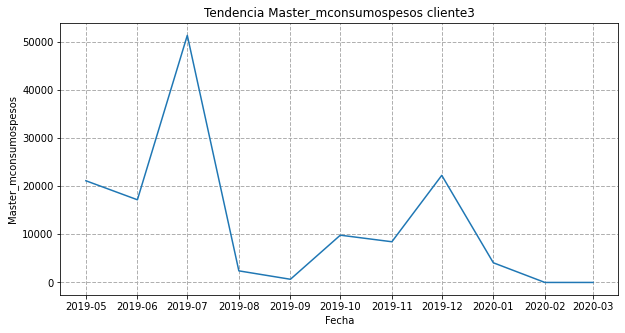

In [ ]:
grafica_cliente3_Master_mconsumospesos.index = pd.DatetimeIndex(dates)

plt.figure(figsize=(10,5))
plt.plot(grafica_cliente3_Master_mconsumospesos)
plt.grid(ls="dashed" ,lw=1 )
plt.ylabel("Master_mconsumospesos")
plt.xlabel("Fecha")
#plt.xticks(ticks=list(grafica_cliente3_Master_mconsumospesos.index))
#plt.xlim(pd.to_datetime("2019-11"), pd.to_datetime("2020-12"))
plt.title("Tendencia Master_mconsumospesos cliente3")
plt.show()


### 3-Varios Clientes

In [ ]:
clientes_cluster3 = cluster3["numero_de_cliente"].value_counts()

In [ ]:
len(clientes_cluster3)

25

In [ ]:
import warnings

warnings.simplefilter("ignore")

In [ ]:
dates={201904:"2019-04",201905:"2019-05",201906:"2019-06",201907:"2019-07",201908:"2019-08",201909:"2019-09",201910:"2019-10",201911:"2019-11",201912:"2019-12",202001:"2020-01",202002:"2020-02",202003:"2020-03",202004:"2020-04",202005:"2020-05",202006:"2020-06",202007:"2020-07",202008:"2020-08",202009:"2020-09",202010:"2020-10",202012:"2020-11",202012:"2020-12"}

In [ ]:
cluster3_dates = cluster3.copy()
cluster3_dates["foto_mes"] = pd.DatetimeIndex(cluster3_dates["foto_mes"].replace(dates))
cluster3_dates

In [ ]:
for i in range(len(clientes_cluster3)):
    cluster3_dates[cluster3_dates["numero_de_cliente"]==cluster3_pendientes.index[i]][["foto_mes","Visa_fultimo_cierre"]].sort_values(by="foto_mes").set_index("foto_mes").plot(title=cluster3_pendientes.index[i])

In [ ]:
nro_cliente = 7598408

In [ ]:
for i, variable in enumerate(variables_finales_cluster1_mes):
  if (variable != "foto_mes"):
    cluster1[cluster1["numero_de_cliente"]==nro_cliente][[variables_finales_cluster1_mes[-1],variables_finales_cluster1_mes[i]]].sort_values(by="foto_mes").set_index("foto_mes").plot()


## Cluster_4


### 1-Intro

In [ ]:
top_variables_filtradas.loc[top_variables_cluster4]

cluster2,1.0,2.0,3.0,4.0,media_centroides,dispersion_centroides,coef_variacion_centroides,cluster_max
mpayroll2,0.000000,22.622359,0.000000,-56.515074,7.015148,965.114700,137.575823,4.0
mprestamos_hipotecarios,0.000000,148.677566,918.985467,1672.496589,340.636227,18893.074254,55.464078,4.0
mplazo_fijo_pesos,0.000000,261.723150,0.000000,2551.794788,485.342410,21775.144814,44.865531,4.0
mcheques_emitidos_rechazados,29.530710,67.435756,0.000000,190.496822,72.336696,1855.228485,25.647128,4.0
mactivos_margen,-167.971971,236.845748,-0.491900,274.073570,147.519139,3699.571472,25.078586,4.0
mcajeros_propios_descuentos,1.713327,1.351297,0.687167,1.870604,1.465741,30.787095,21.004463,4.0
ccheques_emitidos_rechazados,0.001919,0.003419,0.000000,0.013771,0.004274,0.084824,19.846281,4.0
mforex_buy,2.924402,10.775498,0.000000,12.542246,8.927481,143.721133,16.098733,4.0
cprestamos_prendarios,0.000000,0.005342,0.010000,0.010593,0.005075,0.079914,15.745109,4.0
cforex_buy,0.012156,0.022436,0.000000,0.031780,0.020569,0.201130,9.778300,4.0


In [ ]:
cluster4_clusters_coef_variacion = (cluster4.groupby("numero_de_cliente").std() / cluster4.groupby("numero_de_cliente").mean() )
cluster4_clusters_coef_variacion.loc["mean"] =cluster4_clusters_coef_variacion.mean()
cluster4_clusters_coef_variacion.loc["porcentaje_de_nans"] = cluster4_clusters_coef_variacion.isna().sum()/ len(cluster4_clusters_coef_variacion) * 100
cluster4_clusters_coef_variacion[top_variables_cluster4]


,mpayroll2,mprestamos_hipotecarios,mplazo_fijo_pesos,mcheques_emitidos_rechazados,mactivos_margen,mcajeros_propios_descuentos,ccheques_emitidos_rechazados,mforex_buy,cprestamos_prendarios,cforex_buy,...,Master_msaldototal,Visa_delinquency,Visa_status,Master_msaldopesos,Visa_mpagominimo,cseguro_vida,cmobile_app_trx,mprestamos_personales,cprestamos_personales,mcuenta_corriente
numero_de_cliente,,,,,,,,,,,,,,,,,,,,,
4756630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4843404,NaN,NaN,NaN,NaN,4.675796,NaN,NaN,3.464102,NaN,3.464102,...,NaN,2.828427,2.828427,NaN,0.868321,NaN,NaN,NaN,NaN,-1.533224
4874386,NaN,NaN,NaN,NaN,3.515759,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.538968
4937071,NaN,NaN,NaN,NaN,1.843533,NaN,NaN,NaN,NaN,NaN,...,0.480476,1.610153,2.160247,0.480476,1.477559,NaN,NaN,0.644630,0.603023,-1.607019
4971804,NaN,NaN,NaN,1.493735,6.304696,NaN,1.348400,3.464102,NaN,3.464102,...,0.575491,2.108185,2.115967,0.575491,2.131896,0.000000,0.829492,0.603383,0.663986,-1.742524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12402293,NaN,NaN,NaN,NaN,2.448088,NaN,NaN,NaN,NaN,NaN,...,NaN,1.984313,3.000000,NaN,0.527496,NaN,NaN,NaN,NaN,-0.443796
12439530,NaN,NaN,2.365873,NaN,3.363802,NaN,NaN,1.943270,NaN,2.246209,...,NaN,2.645751,1.714884,NaN,0.734076,NaN,3.316625,0.663353,0.610030,-1.731194
12447528,NaN,NaN,NaN,NaN,1.132864,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.480233


In [ ]:
cluster4_clusters_FINAL = cluster4_clusters_coef_variacion[top_variables_cluster4]
cluster4_clusters_FINAL = cluster4_clusters_FINAL[cluster4_clusters_FINAL.T["porcentaje_de_nans"][cluster4_clusters_FINAL.T["porcentaje_de_nans"]<60].index]

In [ ]:
cluster4_clusters_FINAL.T.sort_values(by="porcentaje_de_nans").T

,mactivos_margen,mcuenta_corriente,Visa_status,Visa_mpagominimo,Master_status
numero_de_cliente,,,,,
4756630,NaN,NaN,NaN,NaN,NaN
4843404,4.675796,-1.533224,2.828427,0.868321,NaN
4874386,3.515759,-0.538968,NaN,NaN,NaN
4937071,1.843533,-1.607019,2.160247,1.477559,2.160247
4971804,6.304696,-1.742524,2.115967,2.131896,3.000000
...,...,...,...,...,...
12402293,2.448088,-0.443796,3.000000,0.527496,NaN
12439530,3.363802,-1.731194,1.714884,0.734076,2.115967
12447528,1.132864,-0.480233,NaN,NaN,3.464102


In [ ]:
cluster4_clusters_FINAL.loc["mean"].sort_values(ascending=False)

Master_status        2.612495
Visa_status          2.458479
mactivos_margen      1.585090
Visa_mpagominimo     1.266308
mcuenta_corriente   -1.258638
Name: mean, dtype: float64

In [ ]:
variables_finales_cluster4 = list(cluster4_clusters_FINAL.columns)
variables_finales_cluster4

['mactivos_margen',
 'Master_status',
 'Visa_status',
 'Visa_mpagominimo',
 'mcuenta_corriente']

In [ ]:
from scipy.stats import linregress

In [ ]:
dict_pendientes= {}

for column in variables_finales_cluster4:
  dict_pendientes[column] = cluster4[["numero_de_cliente","foto_mes"]+variables_finales_cluster4].groupby("numero_de_cliente").apply(lambda x: linregress(x.foto_mes, x[column])[0])

cluster4_pendientes = pd.DataFrame(dict_pendientes, index=cluster4["numero_de_cliente"].unique())

In [ ]:
cluster4_pendientes

,mactivos_margen,Master_status,Visa_status,Visa_mpagominimo,mcuenta_corriente
4756630,0.000000,0.000000,0.0,0.0,0.000000
4843404,0.513796,NaN,NaN,NaN,16.740596
4874386,-10.163217,NaN,NaN,NaN,-66.470070
4937071,-5.253202,NaN,NaN,NaN,-4025.131984
4971804,26.713796,NaN,NaN,NaN,-10260.419683
...,...,...,...,...,...
9066421,-1.117568,NaN,NaN,NaN,-203.797679
9217469,-0.975683,NaN,NaN,NaN,-7.030052
12402293,18.414685,NaN,NaN,NaN,-328.967448
12439530,0.318005,NaN,NaN,NaN,-2217.865186


In [ ]:
(cluster4_pendientes < 0).sum()

mactivos_margen      23
Master_status         0
Visa_status           0
Visa_mpagominimo      4
mcuenta_corriente    58
dtype: int64

In [ ]:
cluster4_pendientes.loc["cant_de_pendientes_nulas"] = (cluster4_pendientes < 0).sum()
cluster4_pendientes.loc["cant_de_pendientes_positivas"] = len(cluster4_pendientes) - cluster4_pendientes.loc["cant_de_pendientes_nulas"]
cluster4_pendientes

,mactivos_margen,Master_status,Visa_status,Visa_mpagominimo,mcuenta_corriente
4756630,0.000000,0.000000,0.0,0.0,0.000000
4843404,0.513796,NaN,NaN,NaN,16.740596
4874386,-10.163217,NaN,NaN,NaN,-66.470070
4937071,-5.253202,NaN,NaN,NaN,-4025.131984
4971804,26.713796,NaN,NaN,NaN,-10260.419683
...,...,...,...,...,...
12402293,18.414685,NaN,NaN,NaN,-328.967448
12439530,0.318005,NaN,NaN,NaN,-2217.865186
12447528,1.446709,0.011436,NaN,NaN,-65.141056
cant_de_pendientes_nulas,23.000000,0.000000,0.0,4.0,58.000000


### 2-plots promedios

In [ ]:
caracteristicas_cliente4 = variables_finales_cluster4
caracteristicas_cliente4

['mactivos_margen',
 'Master_status',
 'Visa_status',
 'Visa_mpagominimo',
 'mcuenta_corriente']

In [ ]:
from matplotlib import pyplot as plt

#### **mactivos_margen**

In [ ]:
#clientes_especificos_cluster3 = [4736379, 5239716, 5342550, 5483205, 5512928, 6155952, 6706089]

In [ ]:
clientes_con_pendiente_negativa = list(cluster4_pendientes["mactivos_margen"][cluster4_pendientes["mactivos_margen"]<0].index)

grafica_cliente4_mactivos_margen = cluster4.loc[cluster4["numero_de_cliente"].isin(clientes_con_pendiente_negativa)]
grafica_cliente4_mactivos_margen = grafica_cliente4_mactivos_margen.groupby("foto_mes").mean()["mactivos_margen"]
grafica_cliente4_mactivos_margen.drop(index=[202005,202006], inplace=True)
grafica_cliente4_mactivos_margen

foto_mes
201903    1802.975000
201904    1487.440000
201905       0.000000
201906     943.098333
201907    1598.660909
201908    1458.526429
201909    1156.892353
201910       0.000000
201911    2072.953158
201912    3176.565500
202001    1679.996364
202002    1043.270000
202003    2399.528571
202004    -204.513333
202007   -1634.312500
202008    -384.352222
202009    -337.165714
202010    -161.578000
202011    -330.197500
202012      82.530000
Name: mactivos_margen, dtype: float64

In [ ]:
dates=["2019-03","2019-04","2019-05","2019-06","2019-07","2019-08","2019-09","2019-10","2019-11","2019-12","2020-01","2020-02","2020-03","2020-04","2020-07","2020-08","2020-09","2020-10","2020-11","2020-12"]

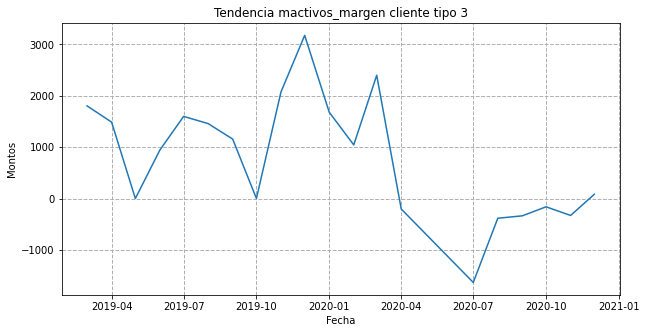

In [ ]:
grafica_cliente4_mactivos_margen.index = pd.DatetimeIndex(dates)

plt.figure(figsize=(10,5))
plt.plot(grafica_cliente4_mactivos_margen)
plt.grid(ls="dashed" ,lw=1 )
plt.ylabel("Montos")
plt.xlabel("Fecha")
#plt.xticks(ticks=list(grafica_cliente4_mactivos_margen.index))
#plt.xlim(pd.to_datetime("2019-11"), pd.to_datetime("2020-12"))
plt.title("Tendencia mactivos_margen cliente tipo 3")
plt.show()


#### **Master_status**

In [ ]:
#clientes_especificos_cluster3 = [4736379, 5239716, 5342550, 5483205, 5512928, 6155952, 6706089]

In [ ]:
#clientes_con_pendiente_negativa = list(cluster4_pendientes["Master_status"][cluster4_pendientes["Master_status"]<0].index)

#grafica_cliente4_Master_status = cluster4.loc[cluster4["numero_de_cliente"].isin(clientes_con_pendiente_negativa)]
grafica_cliente4_Master_status = cluster4.groupby("foto_mes").mean()["Master_status"]
grafica_cliente4_Master_status

foto_mes
201903    0.000000
201904    0.000000
201905    0.000000
201906    0.000000
201907    0.000000
201908    0.375000
201909    0.000000
201910    0.243243
201911    0.375000
201912    0.850000
202001    0.659091
202002    0.953488
202003    1.000000
202004    1.764706
202005    0.375000
202006    3.000000
202007    1.190476
202008    2.076923
202009    1.125000
202010    1.500000
202011    0.000000
202012    4.500000
Name: Master_status, dtype: float64

In [ ]:
dates=["2019-03","2019-04","2019-05","2019-06","2019-07","2019-08","2019-09","2019-10","2019-11","2019-12","2020-01","2020-02","2020-03","2020-04","2020-05","2020-06","2020-07","2020-08","2020-09","2020-10","2020-11","2020-12"]

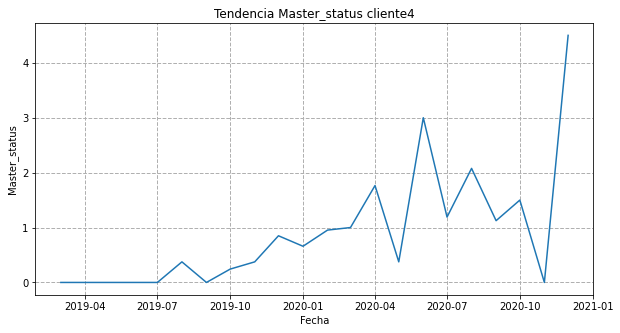

In [ ]:
grafica_cliente4_Master_status.index = pd.DatetimeIndex(dates)

plt.figure(figsize=(10,5))
plt.plot(grafica_cliente4_Master_status)
plt.grid(ls="dashed" ,lw=1 )
plt.ylabel("Master_status")
plt.xlabel("Fecha")
#plt.xticks(ticks=list(grafica_cliente4_Master_status.index))
#plt.xlim(pd.to_datetime("2019-11"), pd.to_datetime("2020-12"))
plt.title("Tendencia Master_status cliente4")
plt.show()


#### **Visa_status**

In [ ]:
#clientes_especificos_cluster3 = [4736379, 5239716, 5342550, 5483205, 5512928, 6155952, 6706089]

In [ ]:
#clientes_con_pendiente_negativa = list(cluster4_pendientes["Visa_status"][cluster4_pendientes["Visa_status"]<0].index)

#grafica_cliente4_Visa_status = cluster4.loc[cluster4["numero_de_cliente"].isin(clientes_con_pendiente_negativa)]
grafica_cliente4_Visa_status = cluster4.groupby("foto_mes").mean()["Visa_status"]
grafica_cliente4_Visa_status

foto_mes
201903    0.000000
201904    0.000000
201905    0.000000
201906    0.000000
201907    0.000000
201908    0.375000
201909    0.000000
201910    0.428571
201911    0.581395
201912    1.214286
202001    0.363636
202002    0.818182
202003    1.279070
202004    1.485714
202005    0.346154
202006    2.838710
202007    0.818182
202008    2.500000
202009    2.000000
202010    1.285714
202011    1.800000
202012    4.500000
Name: Visa_status, dtype: float64

In [ ]:
dates=["2019-03","2019-04","2019-05","2019-06","2019-07","2019-08","2019-09","2019-10","2019-11","2019-12","2020-01","2020-02","2020-03","2020-04","2020-05","2020-06","2020-07","2020-08","2020-09","2020-10","2020-11","2020-12"]

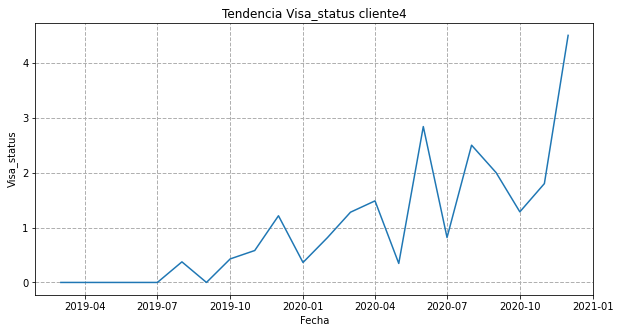

In [ ]:
grafica_cliente4_Visa_status.index = pd.DatetimeIndex(dates)

plt.figure(figsize=(10,5))
plt.plot(grafica_cliente4_Visa_status)
plt.grid(ls="dashed" ,lw=1 )
plt.ylabel("Visa_status")
plt.xlabel("Fecha")
#plt.xticks(ticks=list(grafica_cliente4_Visa_status.index))
#plt.xlim(pd.to_datetime("2019-11"), pd.to_datetime("2020-12"))
plt.title("Tendencia Visa_status cliente4")
plt.show()


#### **Visa_mpagominimo**

In [ ]:
#clientes_especificos_cluster3 = [4736379, 5239716, 5342550, 5483205, 5512928, 6155952, 6706089]

In [ ]:
#clientes_con_pendiente_negativa = list(cluster4_pendientes["Visa_status"][cluster4_pendientes["Visa_status"]<0].index)

#grafica_cliente4_Visa_mpagominimo = cluster4.loc[cluster4["numero_de_cliente"].isin(clientes_con_pendiente_negativa)]
grafica_cliente4_Visa_mpagominimo = cluster4.groupby("foto_mes").mean()["Visa_mpagominimo"]
grafica_cliente4_Visa_mpagominimo.drop(index=[202006], inplace=True)
grafica_cliente4_Visa_mpagominimo

foto_mes
201903     2848.950000
201904     3615.300000
201905     2321.280000
201906     3767.400000
201907     5015.170588
201908     6065.475000
201909     8235.337500
201910    12776.400000
201911     6146.853488
201912    11154.000000
202001    12494.004545
202002    27888.279545
202003    13339.360465
202004      711.025714
202005      663.300000
202007      565.322727
202008     1308.937500
202009      115.537500
202010        0.000000
202011        0.000000
202012        0.000000
Name: Visa_mpagominimo, dtype: float64

In [ ]:
dates=["2019-03","2019-04","2019-05","2019-06","2019-07","2019-08","2019-09","2019-10","2019-11","2019-12","2020-01","2020-02","2020-03","2020-04","2020-05","2020-07","2020-08","2020-09","2020-10","2020-11","2020-12"]

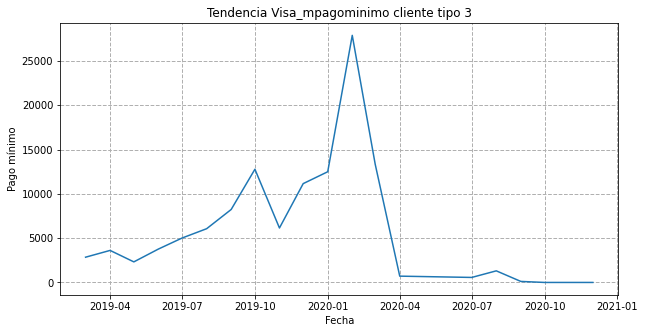

In [ ]:
grafica_cliente4_Visa_mpagominimo.index = pd.DatetimeIndex(dates)

plt.figure(figsize=(10,5))
plt.plot(grafica_cliente4_Visa_mpagominimo)
plt.grid(ls="dashed" ,lw=1 )
plt.ylabel("Pago mínimo")
plt.xlabel("Fecha")
#plt.xticks(ticks=list(grafica_cliente4_Visa_mpagominimo.index))
#plt.xlim(pd.to_datetime("2019-11"), pd.to_datetime("2020-12"))
plt.title("Tendencia Visa_mpagominimo cliente tipo 3")
plt.show()


#### **mcuenta_corriente**

In [ ]:
#clientes_especificos_cluster3 = [4736379, 5239716, 5342550, 5483205, 5512928, 6155952, 6706089]

In [ ]:
clientes_con_pendiente_negativa = list(cluster4_pendientes["mcuenta_corriente"][cluster4_pendientes["mcuenta_corriente"]!=0].index)

grafica_cliente4_mcuenta_corriente = cluster4.loc[cluster4["numero_de_cliente"].isin(clientes_con_pendiente_negativa)]
grafica_cliente4_mcuenta_corriente = grafica_cliente4_mcuenta_corriente.groupby("foto_mes").mean()["mcuenta_corriente"]
grafica_cliente4_mcuenta_corriente.drop(index=[202006], inplace=True)
grafica_cliente4_mcuenta_corriente

foto_mes
201903     -364.222500
201904    -1227.627500
201905     -497.370000
201906    -1149.878824
201907    -2021.466800
201908    -2485.617838
201909    -2187.234894
201910    -1848.433519
201911    -2692.953898
201912    -3697.599355
202001    -8004.087183
202002   -13775.968873
202003   -64079.486970
202004   -85757.047424
202005   -92259.437742
202007   -45601.051333
202008   -25600.972581
202009    -2143.416818
202010    -1543.835294
202011    -2347.383636
202012    -2787.897143
Name: mcuenta_corriente, dtype: float64

In [ ]:
dates=["2019-03","2019-04","2019-05","2019-06","2019-07","2019-08","2019-09","2019-10","2019-11","2019-12","2020-01","2020-02","2020-03","2020-04","2020-05","2020-07","2020-08","2020-09","2020-10","2020-11","2020-12"]

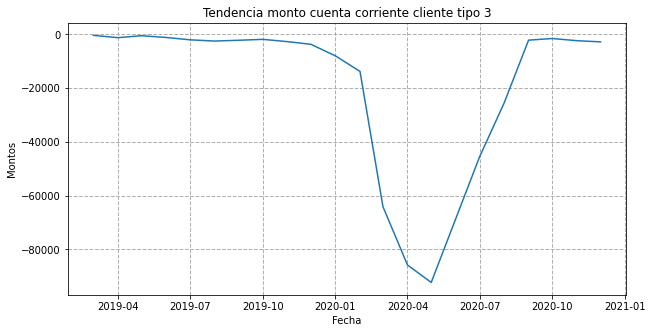

In [ ]:
grafica_cliente4_mcuenta_corriente.index = pd.DatetimeIndex(dates)

plt.figure(figsize=(10,5))
plt.plot(grafica_cliente4_mcuenta_corriente)
plt.grid(ls="dashed" ,lw=1 )
plt.ylabel("Montos")
plt.xlabel("Fecha")
#plt.xticks(ticks=list(grafica_cliente4_mcuenta_corriente.index))
#plt.xlim(pd.to_datetime("2019-11"), pd.to_datetime("2020-12"))
plt.title("Tendencia monto cuenta corriente cliente tipo 3")
plt.show()


### 3-Varios Clientes

In [ ]:
clientes_cluster4 = cluster4["numero_de_cliente"].value_counts()
len(clientes_cluster4)

83

In [ ]:
import warnings

warnings.simplefilter("ignore")

In [ ]:
dates={201903:"2019-03",201904:"2019-04",201905:"2019-05",201906:"2019-06",201907:"2019-07",201908:"2019-08",201909:"2019-09",201910:"2019-10",201911:"2019-11",201912:"2019-12",202001:"2020-01",202002:"2020-02",202003:"2020-03",202004:"2020-04",202005:"2020-05",202006:"2020-06",202007:"2020-07",202008:"2020-08",202009:"2020-09",202010:"2020-10",202012:"2020-11",202012:"2020-12"}

In [ ]:
cluster4_dates = cluster4.copy()
cluster4_dates["foto_mes"] = pd.DatetimeIndex(cluster4_dates["foto_mes"].replace(dates))
cluster4_dates

In [ ]:
clientes_particulares_cluster3 =

In [ ]:
for i in range(len(clientes_cluster4)):
    cluster4_dates[cluster4_dates["numero_de_cliente"]==cluster4_pendientes.index[i]][["foto_mes","mcuenta_corriente"]].sort_values(by="foto_mes").set_index("foto_mes").plot(title=cluster4_pendientes.index[i])

In [ ]:
nro_cliente = 7598408

In [ ]:
for i, variable in enumerate(variables_finales_cluster1_mes):
  if (variable != "foto_mes"):
    cluster1[cluster1["numero_de_cliente"]==nro_cliente][[variables_finales_cluster1_mes[-1],variables_finales_cluster1_mes[i]]].sort_values(by="foto_mes").set_index("foto_mes").plot()
